# **Sentiment Analysis of Amazon Product Reviews: All Beauty Category**

## Problem Statement
Manual analysis of thousands of customer reviews is both slow and prone to human bias, so in this project we leverage NLP libraries to automate sentiment classification. We specifically choose on beauty products because they are an everyday essential and user opinions tend to be highly subjective.Therefore, we concentrate on Amazon’s Beauty category to help shoppers make more informed choices. Although star ratings offer a rough performance signal, they miss the nuanced feedback found in the free-text reviews themselves. We compare three off-the-shelf sentiment scorers (star-rating mapping, TextBlob, VADER) and train five classifiers (Logistic Regression, Naïve Bayes, SVM, Random Forest, Decision Tree) on each resulting label set. By evaluating accuracy and F1-score, we identify the most reliable approach—one that can deliver fast, consistent insights to product managers so they can pinpoint key pain points, guide feature improvements, and ultimately boost customer satisfaction and sales.

## What is Sentiment Analysis? Why it matters?
Sentiment analysis is a text-classification technique that automatically determines whether a piece of writing expresses positive, negative, or neutral sentiment. As customers share their thoughts more openly than ever in product reviews, surveys, or social media—manually reading thousands of comments is impractical and prone to bias. By converting free-form language into structured sentiment scores at scale, organizations can quickly surface emerging product issues, identify high-impact features, and tailor products and services to meet customer needs. In e-commerce, sentiment analysis complements star ratings by capturing the nuance of what customers actually say, making it indispensable for data-driven decisions in product development, marketing, and customer-experience management.

##Objectives of Project


*   Data Collection

*   Preprocessing and Cleaning

*   Exploratory Data Analysis
*   Generate Sentiment Labels via Multiple Strategies


*   Extract Numerical Features


*   Train and Compare Five Classifiers

*   Evaluate Model Performance






## Project Overview

Customer reviews on e-commerce platforms such as Amazon are a valuable source of insights into customer satisfaction, product quality, and overall brand perception. This project focuses on sentiment analysis of customer reviews in the 'All Beauty' category on Amazon.


#### Module submission group
- Group member 1: Aishwarya Shastry Viswanath (as6285@drexel.edu)
- Group member 2: Mi Kin Swan (ms5795@drexel.edu)
- Group member 3: Fatimah Aljohani (fa583@drexel.edu)

In [ ]:
# Import core data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text processing and regular expressions
import re
import spacy

# Import progress bar and word cloud generation tools
from tqdm.notebook import tqdm
from wordcloud import WordCloud


# Data Collection( swan)
The dataset was sourced from the [McAuley Lab Amazon Reviews 2023](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023) collection via Hugging Face. Using the Hugging Face Datasets library, we loaded the “all_beauty” category of both User Reviews and Item Metadata directly into our notebook.

In [ ]:
# Mount Google Drive to access datasets stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the file path to the Amazon beauty reviews CSV file stored in Google Drive
file_path = '/content/drive/MyDrive/PROJECT AMAZON/raw_review_All_Beauty.csv'

In [ ]:
# Install the Hugging Face 'datasets' library to access the metadata
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

🔽 First, we loaded the User Reviews dataset, which contains 701,528 rows and 10 columns, and saved it as a CSV file.

In [ ]:
from datasets import load_dataset

# Load the All_Beauty reviews
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

# Access the full split
reviews = dataset["full"]

# Display the first review
print(reviews[0])


Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [ ]:
reviews

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})

In [ ]:
# Show the first 10 rows
for i in range(10):
    print(reviews[i])


{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 4.0, 'title': 'Works great but smells a little weird.', 'text': 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)', 'images': [], 'asin': 'B081TJ8YS3', 'parent_asin': 'B081TJ8YS3', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1

In [ ]:
import pandas as pd

df = pd.DataFrame(reviews)

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
df.shape

(701528, 10)

In [ ]:
df.to_csv('raw_review_All_Beauty.csv', index=False)

🔽 Second, we loaded the Item Metadata dataset, which contains 112,590 rows and 14 columns, and saved it as a JSONL file.

In [ ]:
pip install requests

In [ ]:
import requests

# URL of the metadata file
url = "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"

# Local file name to save
output_file = "meta_All_Beauty.jsonl"

# Download the file
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(output_file, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Download complete. File saved as {output_file}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

Download complete. File saved as meta_All_Beauty.jsonl


In [ ]:
df_meta = pd.read_json("/content/drive/MyDrive/PROJECT AMAZON/meta_All_Beauty.jsonl", lines=True)

In [ ]:
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


In [ ]:
!curl -L -o meta_All_Beauty.jsonl "https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"


import pandas as pd

df_meta = pd.read_json("meta_All_Beauty.jsonl", lines=True)
df_meta.head()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1118  100  1118    0     0   5323      0 --:--:-- --:--:-- --:--:--  5349
100  203M  100  203M    0     0   146M      0  0:00:01  0:00:01 --:--:--  213M


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


# Reading and Cleaning the data
🔽 After that, we read both the metadata and review files and combined them into a single dataset before beginning preprocessing and cleaning on our selected features for sentiment analysis.

In [ ]:
import json
import pandas as pd

clean_data = []

with open("/content/drive/MyDrive/DSCI-521/meta_All_Beauty.jsonl", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        try:
            clean_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Skipping line {i} due to error: {e}")
            continue

# converting json to datafram
df_meta = pd.DataFrame(clean_data)


df_meta.head()


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,None


In [ ]:
#check for the shape
df_meta.shape

(112590, 14)

In [ ]:
#check for columns
df_meta.columns

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together'],
      dtype='object')

In [ ]:
# reading reviews from google drive
df_reviews = pd.read_csv("/content/drive/MyDrive/DSCI-521/raw_review_All_Beauty.csv")
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [ ]:
#check for the shape
df_reviews.shape

(701528, 10)

In [ ]:
#check for columns
df_reviews.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [ ]:
#Merge with Product Metadata
df_combined = pd.merge(df_reviews, df_meta, on="parent_asin", how="left")

In [ ]:
df_combined.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,384,[],"[If given the choice, weÕd leave most telltale...",NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",None
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,56,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",None
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,699,"[Same Great Product, NEW PACKAGING., MOISTURIZ...",[New Road Beauty Paraffin Wax is recommended f...,21.98,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,None
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,1,[?Hair Bundle Material?:Brazilian Virgin Human...,[Hair Material: Brazilian Virgin Human Hair Bu...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",None
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,20,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,None


In [ ]:
#check for the shape
df_combined.shape

(701528, 23)

In [ ]:
#check for columns
df_combined.columns

Index(['rating', 'title_x', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'title_y', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images_y', 'videos', 'store',
       'categories', 'details', 'bought_together'],
      dtype='object')

In [ ]:
# Display summary info
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title_x            701368 non-null  object 
 2   text               701316 non-null  object 
 3   images_x           701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
 10  main_category      701528 non-null  object 
 11  title_y            701528 non-null  object 
 12  average_rating     701528 non-null  float64
 13  rating_number      701528 non-null  int64  
 14  features           701528 non-null  object 
 15  description        701528 non-null  object 
 16  pr

In [ ]:
# saving the combine dataset
df_combined.to_csv('All_Beauty.csv', index=False)

In [ ]:
# rename the duplicate columns
df_combined = df_combined.rename(columns={
    "title_x": "review_title",
    "title_y": "product_title",
    "images_x": "review_images",
    "images_y": "product_images",
    "text": "review_text"
})


In [ ]:
#check for the columns
df_combined.columns

Index(['rating', 'title_x', 'text', 'images_x', 'asin', 'parent_asin',
       'user_id', 'timestamp', 'helpful_vote', 'verified_purchase',
       'main_category', 'title_y', 'average_rating', 'rating_number',
       'features', 'description', 'price', 'images_y', 'videos', 'store',
       'categories', 'details', 'bought_together'],
      dtype='object')

In [ ]:
#check for null value
df_combined.isnull().sum().sort_values(ascending=False)

,0
bought_together,701528
price,515905
store,49892
text,212
title_x,160
images_x,0
rating,0
user_id,0
parent_asin,0
asin,0


In [ ]:
#Check how many rating star we have
df_combined["rating"].unique()

array([5., 4., 1., 3., 2.])

In [ ]:
# convert rating in to int
df_combined["rating"] = df_combined["rating"].astype(int)

In [ ]:
#after changing int check again
df_combined["rating"].unique()

array([5., 4., 1., 3., 2.])

🔽 Moreover, we first examine the rating column by mapping 4–5 → “positive,” 3 → “neutral,” and 1–2 → “negative.” We then visualize this distribution using a bar chart, box plot, and pie chart.The results show that the majority of ratings fall into the “positive” category.

In [ ]:
# Define a function to map rating to sentiment
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating <= 2:
        return "negative"
    else:
        return "neutral"

# Apply the sentiment function to create a new column
df_combined["sentiment"] = df_combined["rating"].apply(label_sentiment)

# Display the unique values to verify
df_combined["sentiment"].value_counts()

,count
sentiment,
positive,500107
negative,145114
neutral,56307


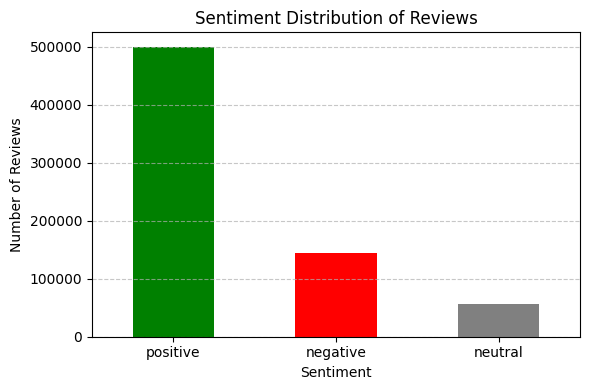

In [ ]:
import matplotlib.pyplot as plt

# Count the number of reviews per sentiment category
sentiment_counts = df_combined["sentiment"].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add titles and labels
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-27-041e4c2fc451>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y="price", data=df_combined, palette=sentiment_palette)


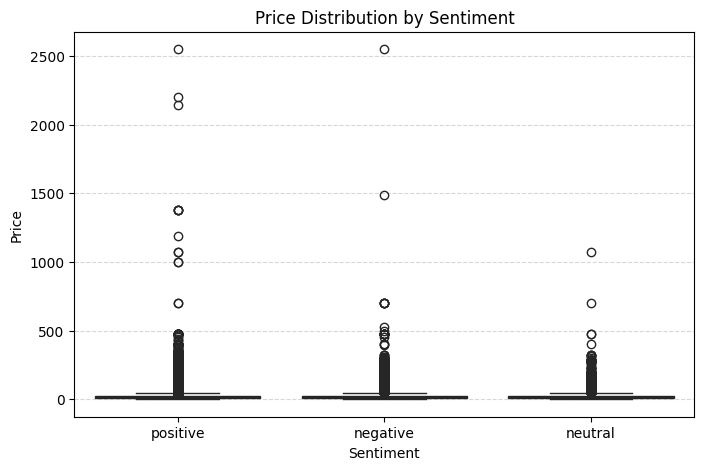

In [ ]:
# explore the rating based in the price

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for sentiment
sentiment_palette = {
    "positive": "green",
    "neutral": "gray",
    "negative": "red"
}

# Boxplot: Price distribution by sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment", y="price", data=df_combined, palette=sentiment_palette)
plt.title("Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



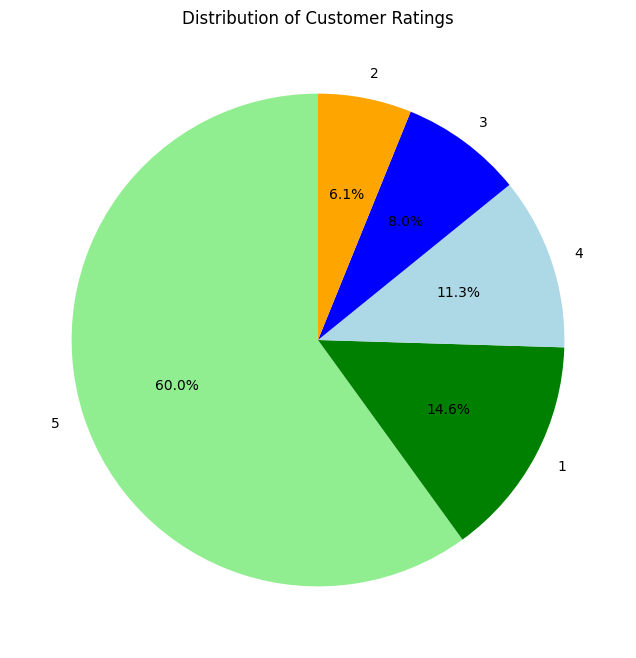

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded

# Calculate rating counts
rating_counts = df_combined['rating'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['lightgreen', 'green', 'lightblue', 'blue', 'orange'])
plt.title('Distribution of Customer Ratings')
plt.show()

🔽 Next, we examine how many products fall into each price range, which shows that the vast majority of beauty products in the dataset are low-priced, and only a few appear in higher price brackets. In other words, the price distribution is heavily right-skewed: most items cost relatively little, and only a small number are very expensive.

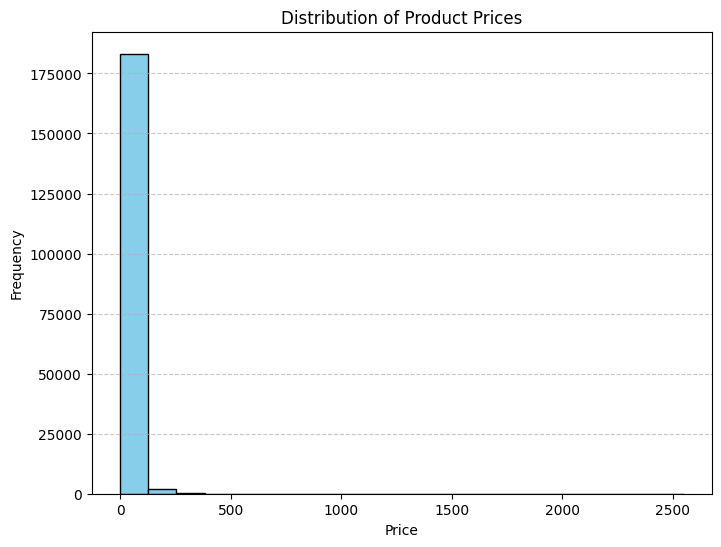

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🔽 Next, we examine the main category column to see how many beauty-product categories we have. Unfortunately, it only shows two: “All Beauty” and “Premium Beauty.” Later, we will create our own subcategories to analyze how customer sentiment is distributed within each custom group.

<ipython-input-30-a08f064b6447>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


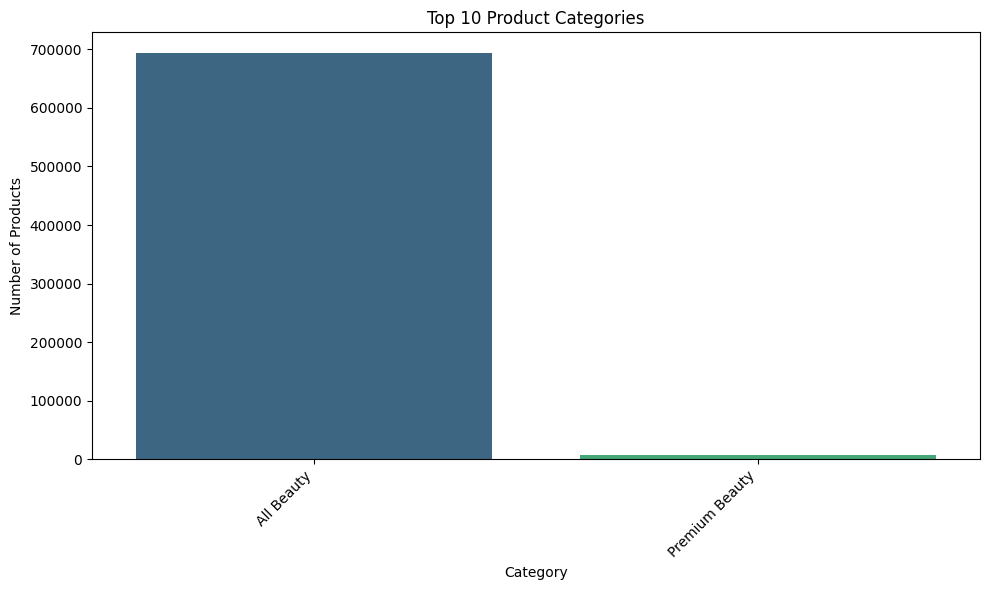

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'main_category' or 'categories' exists
if 'main_category' in df_combined.columns:
    top_categories = df_combined['main_category'].value_counts().head(10)
elif 'categories' in df_combined.columns and isinstance(df_combined['categories'].iloc[0], list):
    # Assuming 'categories' contains lists of categories, flatten and count
    all_categories = [cat for sublist in df_combined['categories'].tolist() for cat in sublist]
    top_categories = pd.Series(all_categories).value_counts().head(10)
else:
    print("Neither 'main_category' nor 'categories' column found with expected format.")

    # If neither of the above works, you might need to examine the DataFrame further
    # to see if any column represents category information under a different name.
    # Print the column names to check:
    print(df_combined.columns)

# Only proceed if top_categories is defined
if 'top_categories' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    plt.title('Top 10 Product Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

🔽 Next, we examine the distribution of sentiment labels for verified versus unverified purchases. We observe that most reviews particularly positive ones—come from verified purchasers, suggesting a strong link between genuine product experience and favorable feedback. In contrast, unverified purchases exhibit a relatively higher share of negative sentiment, which may indicate that reviewers without firsthand experience are more likely to submit critical or misleading feedback.

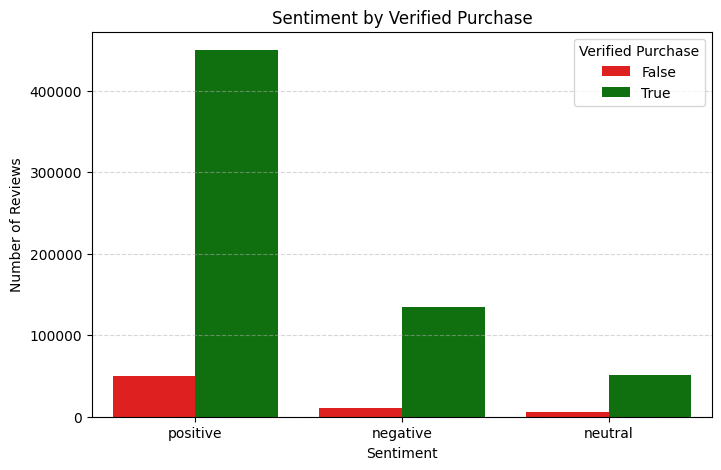

In [ ]:
# explore Sentiment count by Verified Purchase
plt.figure(figsize=(8, 5))

# Map True/False to strings for the palette
verified_palette = {True: "green", False: "red"}

sns.countplot(x="sentiment", hue="verified_purchase", data=df_combined, palette=verified_palette)
plt.title("Sentiment by Verified Purchase")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.legend(title="Verified Purchase")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

🔽 Finally, we defined a function to clean text by removing stopwords, punctuation, and numbers while retaining only words tagged as NOUN, VERB, ADJ, or ADV. We applied this function to both review_title and review_text to create clean_title and clean_text, and then saved the resulting DataFrame as All_Beauty_cleaned.csv.

In [ ]:
from os import pipe
def clean_text(df,text):
  text = df_combined[text].fillna('').astype(str).to_list()
  nlp = spacy.load("en_core_web_sm")
  clean_text = []
  for doc in tqdm(nlp.pipe(text,batch_size= 1000,disable=["ner", "parser"]), total=len(text)):
    stop_words = nlp.Defaults.stop_words
    important_words = {"not", "no", "never", "very", "just", "really","like","empty","ten","must","serious","yes"}
    custom_stopwords = stop_words.difference(important_words)
    tokens =[
        word.lemma_.lower().strip()
        for word in doc
        if not word.is_punct and not word.is_space and word.text.lower() not in custom_stopwords and not word.like_num and word.pos_ in{"NOUN", "VERB", "ADJ", "ADV"}
    ]
    clean_text.append(" ".join(tokens))
  return clean_text

In [ ]:
df_combined['clean_title'] = clean_text(df_combined,'review_title')

  0%|          | 0/701528 [00:00<?, ?it/s]

In [ ]:
df_combined['clean_text'] = clean_text(df_combined,'review_text')

  0%|          | 0/701528 [00:00<?, ?it/s]

In [ ]:
 # saving the clean dataset

df_combined.to_csv('All_Beauty_cleaned.csv', index=False)

### 📥 Loading the Cleaned Dataset and Preparing Date Features *(by Aish)*

In this section, we load the cleaned and preprocessed version of the Amazon Beauty reviews dataset. This dataset has undergone multiple cleaning steps such as lowercasing, removal of punctuation and stopwords, lemmatization, and creation of new fields for modeling.

---

#### 🧹 Loading the Dataset

We read the cleaned dataset `All_Beauty_cleaned.csv` from Google Drive using `pandas`. This dataset includes 27+ columns such as:
- `review_title`, `review_text`, `rating`
- Metadata like `asin`, `store`, `categories`, `details`
- Cleaned text fields: `clean_title`, `clean_text`, and `clean_review`

In [ ]:
# reading the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/DSCI-521/All_Beauty_cleaned.csv")
df.head()

,rating,review_title,review_text,review_images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,product_images,videos,store,categories,details,bought_together,review_date,clean_title,clean_text,clean_review
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,NaN,smell good feel great,smell good feel great
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,NaN,love,love


The dataset contains 27 columns and includes new features such as:

clean_title – cleaned version of the review title
clean_text – cleaned version of the review body
clean_review – concatenation of cleaned title and text
Metadata fields like store, categories, product_images, and videos



---

### **Timestamp Conversion & Date Features**

The original `timestamp` column (in Unix milliseconds) was converted to a human-readable `review_date`. We also extracted the `review_year` and `review_month` to enable time-based analysis.


We visualized the number of reviews per year to identify trends in customer feedback over time.





In [ ]:
# converting timestamp type to date

df['review_date'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

Then, we extract the year and month of each review to allow time-based analysis:

###  **Timestamp Conversion & Date Features**

The original `timestamp` column (in Unix milliseconds) was converted to a human-readable `review_date`. We also extracted the `review_year` and `review_month` to enable time-based analysis.

```

We visualized the number of reviews per year to identify trends in customer feedback over time.


In [ ]:
# Convert timestamp from milliseconds to datetime
df['review_date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Optional: extract year/month for analysis
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# Check the result
print(df[['timestamp', 'review_date', 'review_year', 'review_month']].head())


       timestamp             review_date  review_year  review_month
0  1588687728923 2020-05-05 14:08:48.923         2020             5
1  1588615855070 2020-05-04 18:10:55.070         2020             5
2  1589665266052 2020-05-16 21:41:06.052         2020             5
3  1643393630220 2022-01-28 18:13:50.220         2022             1
4  1609322563534 2020-12-30 10:02:43.534         2020            12


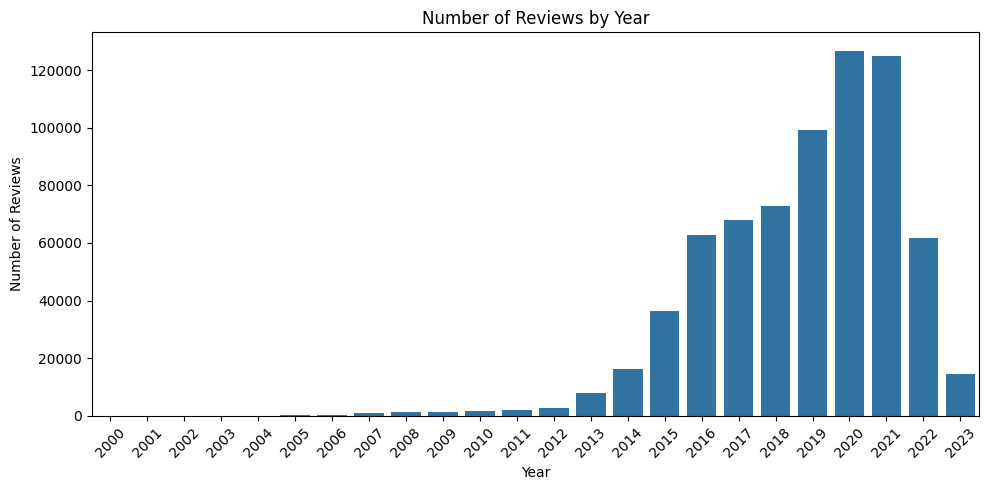

In [ ]:
# Plot number of reviews by year
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='review_year', order=sorted(df['review_year'].dropna().unique()))
plt.title("Number of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Convert timestamp from milliseconds to datetime
df['review_date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Drop the original timestamp column if not needed
df.drop('timestamp', axis=1, inplace=True)

# Optional: Reorder columns to place 'review_date' earlier
# Move 'review_date' to the 4th column (for example)
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('review_date')))
df = df[cols]

# Check a sample
df.sample(5)


,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
163138,5.0,Me time.,The bath bombs are soo amazing and smell so go...,2020-07-23 03:07:07.528,"[{'attachment_type': 'IMAGE', 'large_image_url...",B081G86V1K,B081G86V1K,AEKVDJRBRFTTQXSQKU6VMP65DHVQ,0,True,...,[],BILLIE BEAN,[],"{'Brand': 'BILLIE BEAN', 'Material': 'Polyuret...",NaN,time,bath bomb soo amazing smell good order asap pi...,time bath bomb soo amazing smell good order as...,2020,7
338462,3.0,I felt like I was just a teeny bit funky by th...,I had to reapply twice during the day after th...,2015-08-13 16:43:41.000,[],B00GGLJ2KQ,B00GGLJ2KQ,AHMGZPITBVGXKJ2CQHWX7MREYOZQ,1,True,...,[{'title': 'MAGSOL Natural Deodorant for Women...,Unknown,[],"{'Brand': 'Unknown', 'Item Form': 'Roll-on', '...",NaN,feel just teeny bit funky,reapply twice day application morning feel jus...,feel just teeny bit funky reapply twice day ap...,2015,8
196769,1.0,One Star,Doesn’t work.,2018-04-30 21:42:48.210,[],B01A1X8O1C,B01A1X8O1C,AGVW4JWMSY3D742UQAHDOPQLT66Q,0,True,...,[],MALLOOM,[],"{'Is Discontinued By Manufacturer': 'No', 'Ite...",NaN,NaN,work,work,2018,4
311430,1.0,Not as described or pictured.,Not as described or pictured.,2020-08-06 11:29:04.454,[],B07LBS3WB3,B07LBS3WB3,AFWCR54LH2FPFYLCLCUUIYHYL55Q,0,True,...,[],Fstrend,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN,describe picture,describe picture,describe picture describe picture,2020,8
153055,4.0,Over all the best seasoning /dry veggies!,I use this dry seasoning in any recipe that ca...,2022-05-10 00:00:16.845,[],B08PF4TPMV,B0BTLTVR1X,AGCVXZPFOZMYHYPNSWYEIQ7YBWBQ,0,True,...,[],BORELTH,[],{'Package Dimensions': '9.61 x 7.17 x 3.07 inc...,NaN,well seasoning /dry veggie,use dry seasoning recipe call onion bell peppe...,well seasoning /dry veggie use dry seasoning r...,2022,5


## Sample View
Here's a snapshot of what the updated DataFrame looks like:

review_date: Human-readable review date
review_year & review_month: Useful for time-series or seasonal analysis
Cleaned review content (clean_review) ready for NLP modeling
This step ensures that we are working with a clean, enriched dataset that's structured for both exploratory analysis and machine learning tasks.

In [ ]:
df.sample(5)

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
12762,5.0,Excellent buy,Very nice gloves for showering,2021-04-20 19:51:43.722,[],B0779LGQ2G,B09FFS291Y,AER7AJ2T3KFNMNZQNFA2O36E5GKQ,0,True,...,[{'title': 'Shower Organization Adhesive Shelv...,Sun Laboratories by Giesee,[],"{'Skin Type': 'All', 'Brand': 'Sun Laboratorie...",NaN,excellent buy,very nice glove shower,excellent buy very nice glove shower,2021,4
9026,5.0,Hot stuff!,Perfect for my 12 yo granddaughter who’s learn...,2019-08-20 22:57:16.207,[],B07DPKZPRH,B07DPKZPRH,AEBA7VDKKLR3XYIUPUPY72UZT7ZQ,0,True,...,"[{'title': 'Gave as a Gift. Recepent Loved!', ...",PARWIN,[],"{'Brand': 'PARWIN', 'Hair Type': 'Coarse, Wavy...",NaN,hot stuff,perfect yo granddaughter learn groom style thank,hot stuff perfect yo granddaughter learn groom...,2019,8
395218,5.0,"Gifted to me, so dramatic but easy to apply",My first time wearing fake lashes ever. They w...,2021-12-30 07:26:01.732,"[{'attachment_type': 'IMAGE', 'large_image_url...",B08QS76F57,B08QS76F57,AGO53QWILWXU24HGLPWX7MUCS5PQ,0,False,...,[],Livino,[],"{'Brand': 'Livino', 'Material': 'Cotton', 'Mat...",NaN,gifted dramatic easy apply,time wear fake lash super easy apply give big ...,gifted dramatic easy apply time wear fake lash...,2021,12
531108,5.0,Great product,Works great. My hair quality had improved,2021-01-25 21:44:38.968,[],B07KFNQ33H,B07KFNQ33H,AEU6UTVGBBOZFVJ7AFZGPTLANWCA,1,True,...,"[{'title': ""Our Point of View on L'ange Hair M...",L'ANGE HAIR,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN,great product,work great hair quality improve,great product work great hair quality improve,2021,1
137426,1.0,Don’t waste your money!,This product is nothing like the advertisement...,2019-07-18 15:51:31.818,[],B07M5HB65T,B07M5HB65T,AHJJTTGVT2L3ZKJ5UB4KN4AHLWVA,0,True,...,[{'title': 'Lash Ease Review by Jackelyn Shult...,Allstar Innovations,[],"{'Special Feature': 'Lightweight', 'Brand': 'A...",NaN,waste money,product advertisement long lengthen lash minut...,waste money product advertisement long lengthe...,2019,7


In [ ]:
df.head()

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True,...,"[{'title': 'Best Hair Product For Summer!', 'u...",HERBIVORE,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...,2020,5
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True,...,"[{'title': 'Easy to apply!', 'url': 'https://w...",Two Goats Apothecary,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...,2020,5
2,5.0,Yes!,"Smells good, feels great!",2020-05-16 21:41:06.052,[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True,...,[{'title': 'Opening the Creamsicle assortment ...,New Road Beauty,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,smell good feel great,smell good feel great,2020,5
3,1.0,Synthetic feeling,Felt synthetic,2022-01-28 18:13:50.220,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,...,[],muaowig,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic,2022,1
4,5.0,A+,Love it,2020-12-30 10:02:43.534,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,...,[],Yinhua,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,love,love,2020,12


In [ ]:
df['categories'].fillna('[]', inplace=True)

<ipython-input-42-06f514a316fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['categories'].fillna('[]', inplace=True)


In [ ]:
df['categories'] = df['categories'].apply(lambda x: eval(x))


### 🛠️ **Feature Enrichment and Preparation**

After loading the cleaned dataset, we performed additional data preparation and feature extraction steps to enrich the dataset for deeper analysis and model training.

---
#### 📂 **Combining Cleaned Text**

We created a new feature, `clean_review`, by concatenating `clean_title` and `clean_text`. This unified text field will serve as the input for text vectorization and sentiment modeling.


In [ ]:
df['clean_review'] = df['clean_title'] + " " + df['clean_text']

In [ ]:
df.sample(5)

,rating,review_title,review_text,review_date,review_images,asin,parent_asin,user_id,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month
213571,5.0,Awesome,My boys love them!,2021-06-25 11:31:03.455,[],B093GRLKB9,B093GRLKB9,AHWZVDVUGI7XSTLXYJEBIQLV2UPA,0,True,...,[{'title': 'finally in on the pop it trend! 🌈'...,LAVONE,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN,NaN,boy love,NaN,2021,6
621542,5.0,Ingredients,I love the way my skin feels after using this ...,2018-07-16 17:51:25.345,[],B07894LH23,B07894LH23,AE7HO4KU7WKPUYKF5Z5IZQ2OMHVA,0,True,...,[],AnatoliaDaphne,[],"{'Item Form': 'Bar', 'Skin Type': 'All', 'Bran...",NaN,ingredient,love way skin feel soap very mild gentle sensi...,ingredient love way skin feel soap very mild g...,2018,7
617697,3.0,"Estan mas o menos,mucho trabajo para poner",Las quiero para mis uñas pero son dificiles de...,2021-08-09 22:37:47.412,[],B085LCT1CR,B085LCT1CR,AFOEAIRDLLLTUVGFYVXSTEWLPMJQ,0,True,...,[],Comdoit,[],"{'Brand': 'Comdoit', 'Theme': 'Botanical', 'Ca...",NaN,estan mas menos mucho trabajo para poner,uñas pero son poner,estan mas menos mucho trabajo para poner uñas ...,2021,8
597103,5.0,Great body wash for sensitive skin!,"I have very fair, very sensitive skin that is ...",2013-08-22 23:47:12.000,[],B00899F1V2,B00899F1V2,AHZZASH5OVT36HBVESIOGQNTRCJA,1,True,...,[],Paradise Island,[],"{'Brand': 'Paradise Island', 'Item Form': 'Liq...",NaN,great body wash sensitive skin,very fair very sensitive skin prone itching ra...,great body wash sensitive skin very fair very ...,2013,8
71056,5.0,All day,Back scratching magic. Exfoliating.,2017-01-10 01:54:20.000,[],B01E3MF6KE,B01E3MF6KE,AFT7L4GHIGHQMOHIHGCBW2JCWNVA,0,False,...,[],Esarora,[],"{'Material': 'Boar bristle, Bamboo', 'Brand': ...",NaN,day,scratch magic exfoliate,day scratch magic exfoliate,2017,1


In [ ]:
# Remove duplicates
df.drop_duplicates(subset='clean_text', inplace=True)

## Cleaning Up

After the conversion, we dropped the original timestamp column and reorganized the columns to place review_date near the front for better visibility.

In [ ]:
df.drop(columns=['review_images'], inplace=True)



#### **Extracting 'Hair Type' Information**

From the newly created `details_dict`, we extracted the `Hair Type` attribute and created a new column. Missing or unknown values were labeled as `'Unknown'`.



In [ ]:
# Convert string dict to actual dict
from ast import literal_eval
df['details_dict'] = df['details'].apply(lambda x: literal_eval(x) if pd.notnull(x) else {})

# Extract a sample feature
df['Hair_Type'] = df['details_dict'].apply(lambda x: x.get('Hair Type', None))




#### 🧾 **Parsing the `details` Column**

The `details` column contains product specifications in stringified dictionary format. To extract useful features (like Hair Type), we used Python’s `literal_eval` to safely convert strings into dictionaries



In [ ]:
# Function to safely convert strings to dictionaries
def safe_literal_eval(x):
    try:
        return literal_eval(x) if isinstance(x, str) and x not in ['', 'nan'] else {}
    except (ValueError, SyntaxError):  # Handle malformed strings
        return {}

# Convert string dict to actual dict, handling errors
df['details_dict'] = df['details'].apply(safe_literal_eval)

# Extract 'Hair Type' feature, providing a default value
df['Hair_Type'] = df['details_dict'].apply(lambda x: x.get('Hair Type', 'Unknown'))

#### **Binning Helpfulness Votes**

To better understand review usefulness, we categorized `helpful_vote` into bins using `pd.cut`. This `helpful_bin` column allows for grouped analysis of reviews by perceived helpfulness.

In [ ]:
df['helpful_bin'] = pd.cut(df['helpful_vote'], bins=[-1, 0, 2, 10, 50, 1000], labels=['0', '1-2', '3-10', '11-50', '50+'])



#### 🧾 Sample View of Final Dataset

After these transformations, our enriched dataset contains over **30 columns**, including:

* `clean_review`: preprocessed text for NLP
* `Hair_Type`: extracted from product metadata
* `helpful_bin`: binned helpfulness scores
* `review_date`, `review_year`, `review_month`: derived from timestamps

These features provide a robust foundation for sentiment analysis, user behavior modeling, and product category analysis.


Certainly! Here's a **concise and cohesive description** combining all the key points from your feature extraction and enrichment section. You can paste this into a markdown cell in your notebook:

---

### 🛠️ **Feature Enrichment and Preparation – Summary**

After loading the cleaned Amazon Beauty reviews dataset, we performed several enrichment steps to prepare it for sentiment analysis and modeling. We began by combining `clean_title` and `clean_text` into a unified `clean_review` column, which serves as the main input for NLP tasks. We then processed the `categories` column by safely converting stringified lists into actual Python lists. For the `details` column—containing structured product metadata—we used a robust parsing function to convert string dictionaries into usable Python dictionaries and extracted specific attributes like `Hair Type`, labeling unknown values accordingly.

To support analysis of review quality, we binned the `helpful_vote` count into a new categorical variable, `helpful_bin`, representing perceived helpfulness ranges (e.g., 0, 1–2, 3–10, etc.). We also converted the original Unix `timestamp` to human-readable `review_date` and extracted `review_year` and `review_month` for time-based analysis.

These enhancements resulted in a richly structured dataset of over 30 columns, enabling advanced text modeling, sentiment classification, and user behavior insights.




In [ ]:
df.head()


,rating,review_title,review_text,review_date,asin,parent_asin,user_id,helpful_vote,verified_purchase,main_category,...,details,bought_together,clean_title,clean_text,clean_review,review_year,review_month,details_dict,Hair_Type,helpful_bin
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,2020-05-05 14:08:48.923,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True,All Beauty,...,"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...,2020,5,"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",Wavy,0
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",2020-05-04 18:10:55.070,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True,All Beauty,...,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...,2020,5,"{'Brand': 'Two Goats Apothecary', 'Item Form':...",Unknown,1-2
2,5.0,Yes!,"Smells good, feels great!",2020-05-16 21:41:06.052,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True,All Beauty,...,{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,smell good feel great,NaN,2020,5,{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,Unknown,1-2
3,1.0,Synthetic feeling,Felt synthetic,2022-01-28 18:13:50.220,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,All Beauty,...,"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic,2022,1,"{'Brand': 'muaowig', 'Material': 'Human Hair',...",Wavy,0
4,5.0,A+,Love it,2020-12-30 10:02:43.534,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,All Beauty,...,{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,love,NaN,2020,12,{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,Unknown,0




### 🧴🧼 **Sub-Category Classification Based on Product Titles**

To better understand the types of beauty products in our dataset, we created a new feature called `sub_category` that classifies each product based on keywords found in the `product_title`. This helps in segmenting the dataset for more targeted analysis such as sentiment trends within each product category.

---

#### 🛠️ **Classification Process**

We defined a custom function `extract_subcategory()` to scan each product title for relevant keywords and assign it to one of the following predefined sub-categories:

* **Hair Care** (e.g., shampoo, conditioner, hair)
* **Skin Care** (e.g., moisturizer, serum, face wash)
* **Makeup** (e.g., lipstick, foundation, mascara)
* **Fragrance** (e.g., perfume, cologne)
* **Body Care** (e.g., body wash, soap)
* **Nail Care** (e.g., nail polish, manicure)
* **Sun Care** (e.g., sunscreen, SPF)
* **Deodorant**
* **Other** (when no matching keywords were found)
* **Unknown** (if title was missing)

We then applied this function to the dataset:

```python
df["sub_category"] = df["product_title"].apply(extract_subcategory)
```

---

#### 📊 **Sub-Category Distribution**

After classification, we used value counts and a bar plot to visualize how reviews are distributed across different sub-categories.

```python
sub_category_counts = df['sub_category'].value_counts()
```
This helped us understand which types of products dominate the dataset. For example:

* **Hair Care** and **Other** were the most frequent sub-categories.
* Niche categories like **Sun Care** and **Deodorant** had fewer reviews.


In [ ]:
import pandas as pd

# Define a function to extract sub-category from the product title
def extract_subcategory(title):
    if pd.isnull(title):
        return "Unknown"

    # Convert title to lowercase for easier keyword matching
    title = title.lower()

    # Classify based on presence of keywords in the title
    if any(keyword in title for keyword in ["shampoo", "conditioner", "hair"]):
        return "Hair Care"
    elif any(keyword in title for keyword in ["moisturizer", "serum", "cream", "lotion", "cleanser", "face wash"]):
        return "Skin Care"
    elif any(keyword in title for keyword in ["lipstick", "mascara", "eyeshadow", "foundation", "concealer", "blush"]):
        return "Makeup"
    elif any(keyword in title for keyword in ["perfume", "fragrance", "eau de", "cologne"]):
        return "Fragrance"
    elif any(keyword in title for keyword in ["body wash", "soap", "scrub", "bath"]):
        return "Body Care"
    elif any(keyword in title for keyword in ["nail", "polish", "manicure", "pedicure"]):
        return "Nail Care"
    elif any(keyword in title for keyword in ["sunscreen", "spf", "sunblock"]):
        return "Sun Care"
    elif any(keyword in title for keyword in ["deodorant", "antiperspirant"]):
        return "Deodorant"
    else:
        return "Other"

# Apply the function to classify products based on their title
df["sub_category"] = df["product_title"].apply(extract_subcategory)

# Display the frequency of each sub-category
df["sub_category"].value_counts()

,count
sub_category,
Other,247965
Hair Care,172662
Nail Care,52886
Skin Care,50829
Body Care,28878
Makeup,27382
Fragrance,12108
Deodorant,5928
Sun Care,2312



We visualized the distribution with the following plot:


#### ✅ **Outcome**

This sub-category classification enables us to:

* Perform more detailed exploratory data analysis
* Compare sentiment scores or review patterns across categories
* Use sub-category as an additional feature in predictive models

---

Let me know if you'd like to convert this into a slide or summary table as well!


<ipython-input-53-ecba62e1b8fb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='viridis')


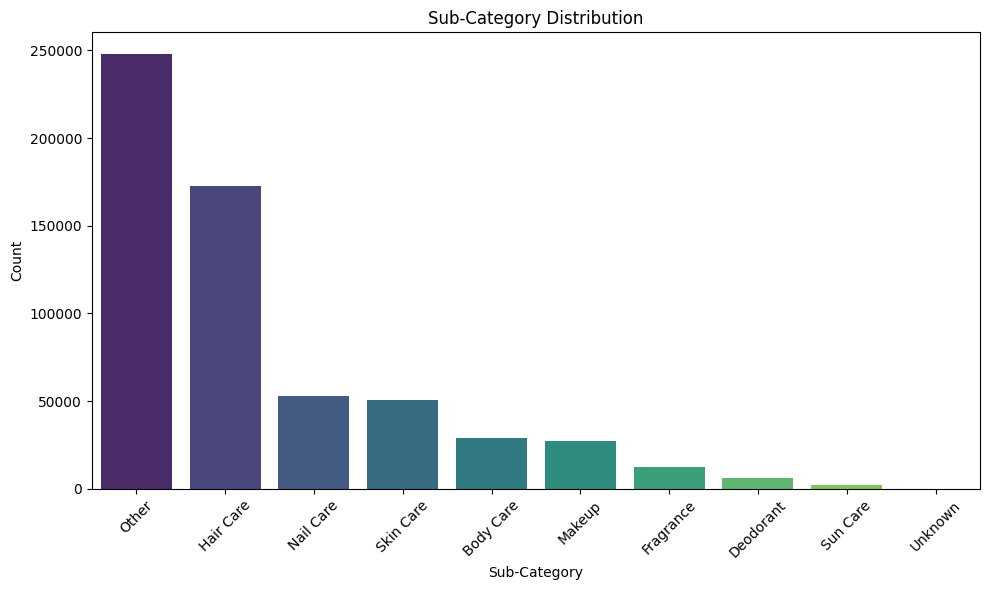

In [ ]:
#plot
import matplotlib.pyplot as plt
import seaborn as sns
sub_category_counts = df['sub_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette='viridis')
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#### 📊 **Sub-Category Distribution**

After classification, we used value counts and a bar plot to visualize how reviews are distributed across different sub-categories.


This helped us understand which types of products dominate the dataset. For example:

* **Hair Care** and **Other** were the most frequent sub-categories.
* Niche categories like **Sun Care** and **Deodorant** had fewer reviews.

We visualized the distribution with the following plot:


In [ ]:
df = df[~df['sub_category'].isin(['Unknown'])]  # Remove Unknowns


In [ ]:
small_cats = ['Fragrance', 'Deodorant', 'Sun Care']
df['sub_category_grouped'] = df['sub_category'].apply(lambda x: x if x not in small_cats else 'Other')


<ipython-input-55-0e6362373b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub_category_grouped'] = df['sub_category'].apply(lambda x: x if x not in small_cats else 'Other')


### 📊 Sentiment Distribution & Time-Based Rating Trends

In this section, we performed two key analyses:

---

#### 1️⃣ Sentiment Distribution by Product Sub-Category

We created sentiment labels based on review ratings:
- Ratings **≥ 4** → **Positive**
- Ratings **= 3** → **Neutral**
- Ratings **≤ 2** → **Negative**

Using this classification, we plotted the distribution of sentiments across different `sub_category` values (e.g., Hair Care, Skin Care, Makeup). This allowed us to see which product types had more balanced or polarized reviews.

---

#### 2️⃣ Time-Based Product Rating Trends

We calculated the **change in product rating over time** to assess how customer perception has shifted. Using the `groupby().diff()` method, we computed a column `Delta` to reflect the difference in ratings spaced six entries apart (as a proxy for time progression).

Focusing on the **Skin Care** sub-category, we identified the **Top 10 products** with the most improved ratings and visualized them in a bar chart. This highlighted which skincare products have gained favor among users over the years.

These analyses help uncover:
- Sentiment tendencies across product types
- Long-term improvements in customer satisfaction


In [ ]:
# Create sentiment labels from ratings
df['Sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

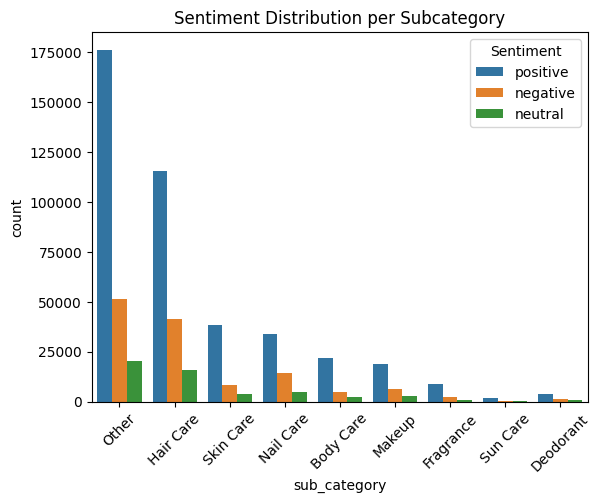

In [ ]:
sns.countplot(data=df, x='sub_category', hue='Sentiment')
plt.xticks(rotation=45)
plt.title('Sentiment Distribution per Subcategory')
plt.show()


<ipython-input-58-ee720ee57a3c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(), rotation=90)


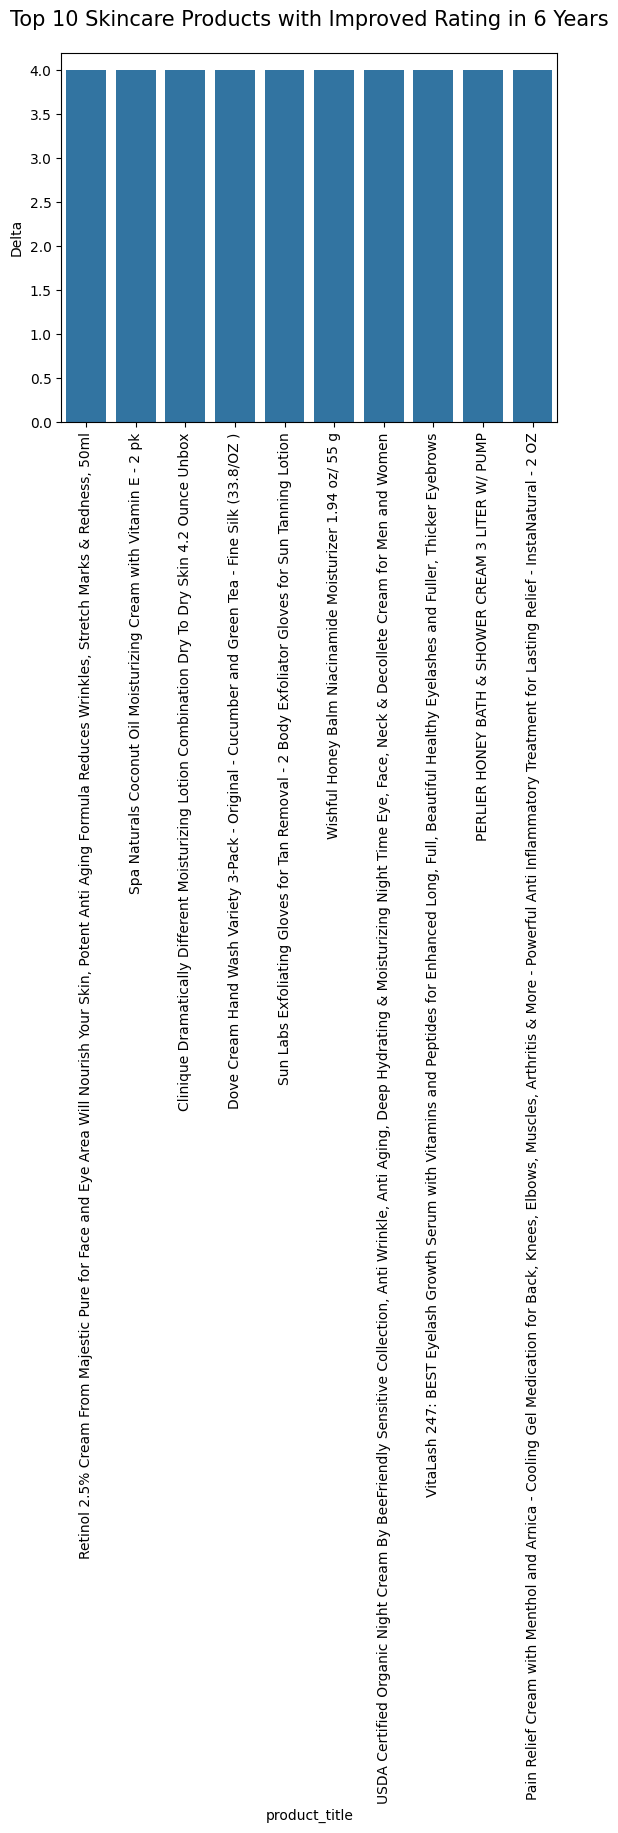

In [ ]:

import pandas as pd


# Calculate the change in rating over 6 years

df['Delta'] = df.groupby('product_title')['rating'].diff(periods=6)  # Difference over 6 years

# Filter for skincare products and select top 10 with highest improvement
# Replace 'sub_category' with the column representing product category if it's not 'category'
top_10_rise_skin = df[df['sub_category'] == 'Skin Care'].sort_values(by='Delta', ascending=False).head(10)

# Create the barplot
Top_10_plt = sns.barplot(x='product_title', y='Delta', data=top_10_rise_skin)  # Use the DataFrame directly
Top_10_plt.set_title('Top 10 Skincare Products with Improved Rating in 6 Years', fontsize=15, y=1.05)
Top_10_plt.set_xticklabels(Top_10_plt.get_xticklabels(), rotation=90)
plt.show()

#### 🗂️ Product Classification by Main Category

We checked how reviews are distributed across the two main product categories:


In [ ]:
# each product classification
df['main_category'].value_counts()


,count
main_category,
All Beauty,594621
Premium Beauty,6329





#### Handling Missing Values

We checked for missing values using

Then we dropped rows with missing values in the `clean_review` or `Sentiment` columns as these are critical for sentiment modeling:






In [ ]:
# See nulls
df.isnull().sum().sort_values(ascending=False)

# Drop rows with missing clean_review or sentiment
df = df.dropna(subset=['clean_review', 'Sentiment'])



#### 🆕 . Creating a Binary Helpfulness Feature

We added a new feature `helpful` that marks a review as "helpful" (1) if it received at least one helpful vote:



In [ ]:
# Create a new binary feature: was the review helpful or not
df['helpful'] = df['helpful_vote'].apply(lambda x: 1 if x > 0 else 0)

# You can also look at helpfulness by sentiment:
helpful_summary = df.groupby('Sentiment')['helpful_vote'].mean()
helpful_summary

<ipython-input-64-c8ee0cd69cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['helpful'] = df['helpful_vote'].apply(lambda x: 1 if x > 0 else 0)


,helpful_vote
Sentiment,
negative,0.969622
neutral,0.766310
positive,1.064701


### 📅 Monthly Review Trends Over Time

In this section, we analyzed how the volume of product reviews changed over time.


####   Creating a Monthly Period Column

We extracted the **month and year** from the `review_date` column using `dt.to_period('M')` and stored it in a new column `review_month`.Also We grouped the dataset by `review_month` and counted the number of reviews in each month:



📌 **Insight:**
This visualization helps us understand periods of high or low user engagement and whether review activity increased over specific years (e.g., spikes around 2020–2021).




<ipython-input-69-e26ff83f3265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_month'] = df['review_date'].dt.to_period('M')


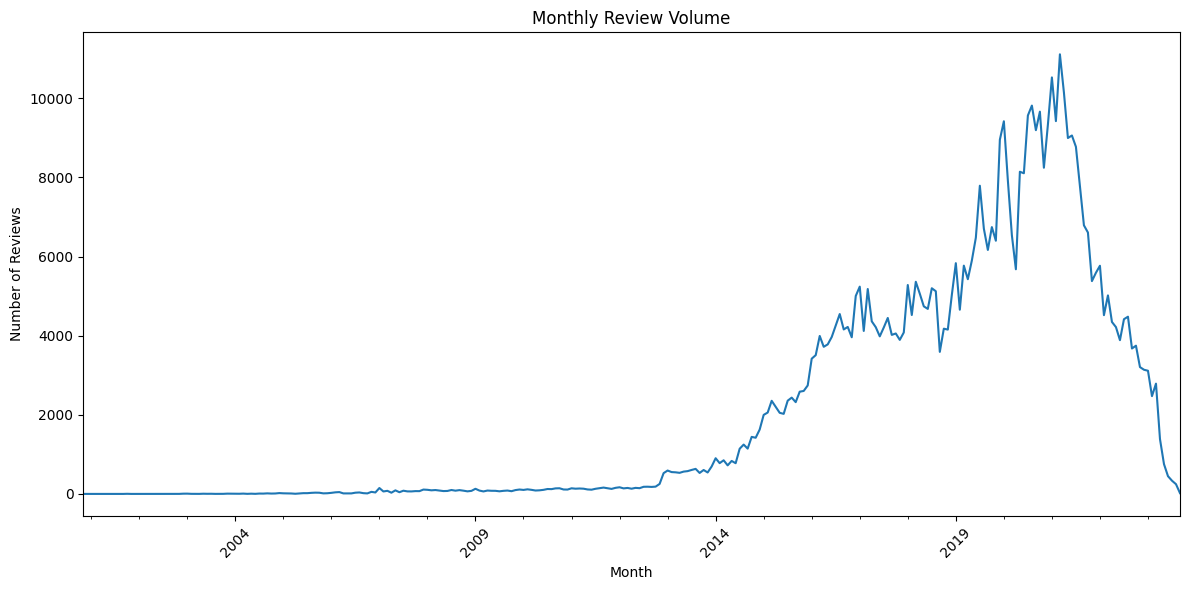

In [ ]:
# Monthly reviews over time
df['review_month'] = df['review_date'].dt.to_period('M')
monthly_reviews = df.groupby('review_month').size()

monthly_reviews.plot(kind='line', figsize=(12, 6), title='Monthly Review Volume')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


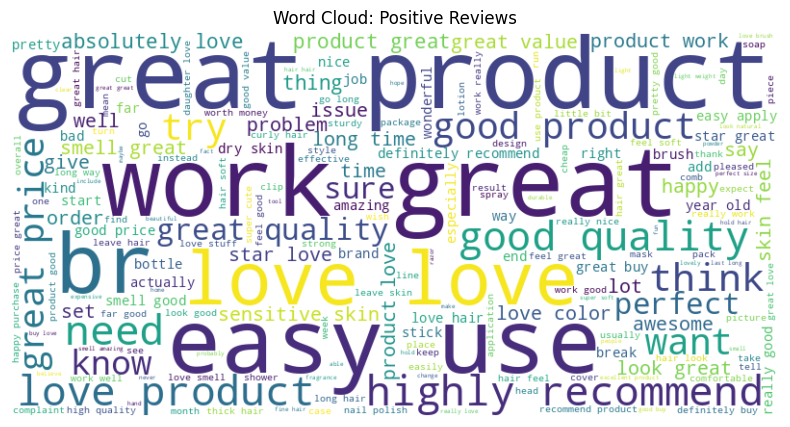

In [ ]:
# Monthly reviews over time
df['review_month'] = df['review_date'].dt.to_period('M')
monthly_reviews = df.groupby('review_month').size()

monthly_reviews.plot(kind='line', figsize=(12, 6), title='Monthly Review Volume')
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




####. Verifying Product Categories

We inspected the unique values in the `main_category` column:



Filtered to only show products in the **All Beauty** category and verified the filtering
This ensures that subsequent analyses (like time trends or sentiment by category) focus specifically on the dominant category in our dataset

In [ ]:
#list of all produtcs category
df['main_category'].unique()


array(['All Beauty', 'Premium Beauty'], dtype=object)

In [ ]:
# Filter the DataFrame to select rows where the 'main_category' column equals 'All Beauty'
filtered_df = df[df['main_category'] == 'All Beauty']

# Get the unique values in the 'main_category' column of the filtered DataFrame
unique_categories = filtered_df['main_category'].unique()

# Print the unique categories (should only be 'All Beauty' if the filtering worked)
print(unique_categories)

['All Beauty']


In [ ]:
print(df['main_category'].unique())

['All Beauty' 'Premium Beauty']


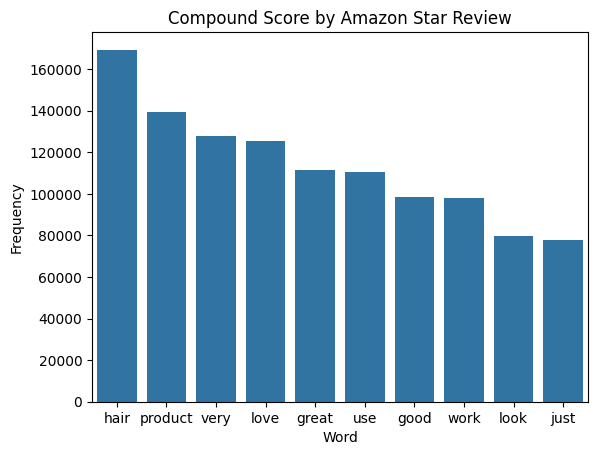

In [ ]:
# Show top 10 frequent words
word_freq = word_count(df, 'clean_text')
top_10_words = word_freq.most_common(10)
top_10_words = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Correct the column names in the sns.barplot call:
ax = sns.barplot(data=top_10_words, x='Word', y='Frequency')  # Use 'Word' and 'Frequency'

ax.set_title('Compound Score by Amazon Star Review')
plt.show()

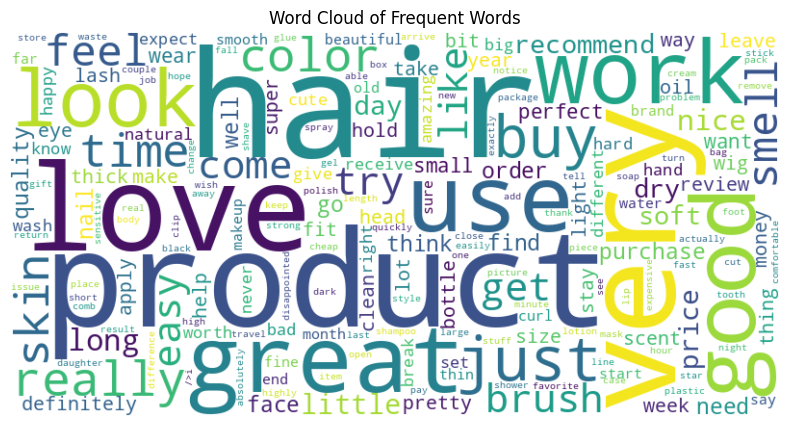

In [ ]:
#Word cloud of frequent words
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words')
plt.show()

### 📊 Sentiment Class Distribution

To understand the balance of sentiment labels in our dataset, we visualized the distribution of `Sentiment` values using a bar plot:


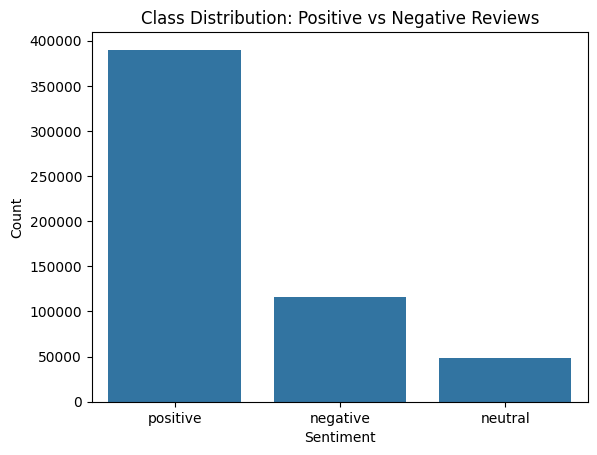

Sentiment
positive    0.703061
negative    0.210159
neutral     0.086779
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Sentiment')
plt.title("Class Distribution: Positive vs Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Check actual counts/ratios
print(df['Sentiment'].value_counts(normalize=True))


## 🔍 Exploratory Data Analysis (EDA) & Feature Engineering – Summary

In this section, we explored the dataset thoroughly and engineered meaningful features to prepare it for sentiment classification and modeling.

---

### 📊 Exploratory Data Analysis (EDA)

#### 1️⃣ Dataset Overview
- Loaded a cleaned dataset with ~600,000 Amazon product reviews in the **All Beauty** and **Premium Beauty** categories.
- Key columns included: `rating`, `review_text`, `verified_purchase`, `helpful_vote`, `categories`, and product `details`.

#### 2️⃣ Temporal Analysis
- Converted the Unix `timestamp` column into a human-readable `review_date`.
- Extracted `review_year` and `review_month` for time-based trend analysis.
- Visualized **monthly review volume** using a line plot to observe customer engagement over time.

#### 3️⃣ Rating Distribution
- Plotted the distribution of `rating` values (1–5 stars).
- Identified that the dataset is **skewed toward positive ratings** (4–5 stars).

#### 4️⃣ Sentiment Distribution
- Created a new `Sentiment` column from ratings:
  - 4–5 → Positive  
  - 3 → Neutral  
  - 1–2 → Negative
- Count plot showed class imbalance with ~70% positive reviews.
- Calculated exact proportions using `value_counts(normalize=True)`.

#### 5️⃣ Sub-Category Classification
- Created a new column `sub_category` by extracting product types (e.g., "shampoo" → Hair Care).
- Visualized the distribution of reviews across sub-categories using a bar plot.

#### 6️⃣ Product Metadata Exploration
- Parsed the `details` column (stringified dictionary) using `literal_eval`.
- Extracted meaningful product attributes like `Hair_Type`.

#### 7️⃣ Helpfulness Analysis
- Created a binary feature `helpful` (1 if `helpful_vote` > 0).
- Grouped by sentiment to calculate average helpfulness:
  - Positive and negative reviews were more often marked helpful than neutral ones.

#### 8️⃣ Time-Based Product Rating Trends
- Calculated `Delta` (change in rating) to track improvement over time.
- Identified the **top 10 Skin Care products** with the highest increase in rating over a 6-year span.

---

### ⚙️ Feature Engineering

We created several new features to enhance the dataset and support effective model training:

#### ✅ Text Features
- `clean_title` and `clean_text`: Preprocessed versions of raw review content.
- `clean_review`: Combined `clean_title` + `clean_text` as a unified input for sentiment modeling.

#### 🕓 Time Features
- `review_year`, `review_month`: Extracted from converted `review_date`.

#### 📦 Categorical Features
- `sub_category`: Product type (Hair Care, Makeup, etc.) derived from title keywords.
- `Hair_Type`: Extracted from `details_dict`.

#### 👍 Helpfulness Features
- `helpful`: Binary feature based on `helpful_vote`.
- `helpful_bin`: Grouped helpful vote ranges (e.g., 0, 1–2, 3–10, etc.)

These enriched features laid the foundation for robust sentiment classification and deeper product insights.


## 🧠 Sentiment Classification: Three Approaches

In this section, we classified the sentiment of customer reviews into three categories:
- **Positive**
- **Negative**
- **Neutral**

We applied and compared three different sentiment classification techniques:

---

### 1️⃣ Manual Labeling Based on Star Ratings

We first created sentiment labels using the `rating` column, which reflects the star rating provided by the customer (from 1 to 5).

This method assumes that star ratings accurately reflect the customer's sentiment toward the product.

---

### 2️⃣ Rule-Based Classification Using TextBlob

We then applied the `TextBlob` library, which uses a built-in sentiment lexicon to compute a **polarity score** for each review and then it's automatically classified into a sentiment category based on its polarity score.

---

### 3️⃣ Rule-Based Classification Using VADER

Finally, we used `VADER` (Valence Aware Dictionary and sEntiment Reasoner) from the NLTK library. It is especially effective for short texts and reviews. VADER calculates a **compound sentiment score**

Like TextBlob, this method also assigns sentiment directly from the text content of the review.

---

### 🎯 Why Use Three Methods?

Using multiple sentiment classification approaches allows us to:

- Compare rule-based predictions (TextBlob & VADER) to the star-based ground truth
- Explore whether textual sentiment aligns with user ratings
- Identify inconsistencies or patterns between rating and review content



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/Amazon/All_Beauty_cleaned.csv')

In [ ]:
df.columns

Index(['rating', 'review_title', 'review_text', 'review_images', 'asin',
       'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'product_title', 'average_rating',
       'rating_number', 'features', 'description', 'price', 'product_images',
       'videos', 'store', 'categories', 'details', 'bought_together',
       'review_date', 'clean_title', 'clean_text', 'clean_review'],
      dtype='object')

In [ ]:
df['rating'].value_counts()

,count
rating,
5.0,420726
1.0,102080
4.0,79381
3.0,56307
2.0,43034


### 1️⃣ Manual Labeling Based on Star Ratings


To establish a baseline for sentiment classification, we manually labeled each review using the numerical star ratings provided by customers (from 1 to 5).

We defined the sentiment classes as follows:

- Ratings **1 or 2** → **Negative (0)**
- Rating **3** → **Neutral (1)**
- Ratings **4 or 5** → **Positive (2)**

This approach assumes that the star rating reflects the user's sentiment toward the product.

We then created a new column called `label` in the dataset to store these sentiment categories.

This manual labeling will be used as the **ground truth** when comparing results from rule-based models such as **TextBlob** and **VADER**.

In [ ]:
# Convert rating column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Keep only ratings 1 through 5 (drop any missing or invalid ratings)
df = df[df['rating'].isin([1, 2, 3, 4, 5])]

# Create multi-class sentiment labels:
# 0 = Negative, 1 = Neutral, 2 = Positive
def label_sentiment(rating):
    if rating in [1, 2]:
        return 0
    elif rating == 3:
        return 1
    else:  # rating 4 or 5
        return 2

df['label'] = df['rating'].apply(label_sentiment)


In [ ]:
df['label'].value_counts()

,count
label,
2,500107
0,145114
1,56307


In [ ]:
df['label'].value_counts(normalize=True) * 100

,proportion
label,
2,71.288245
0,20.685418
1,8.026337


<ipython-input-8-ca1cbdffd9e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


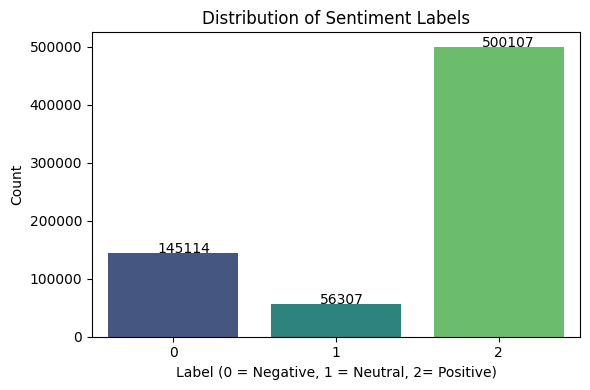

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))


sns.countplot(x='label', data=df, palette='viridis')


plt.title('Distribution of Sentiment Labels')
plt.xlabel('Label (0 = Negative, 1 = Neutral, 2= Positive)')
plt.ylabel('Count')


for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 50))

plt.tight_layout()
plt.show()


## 2️⃣ Sentiment Classification Using TextBlob

In this section, we used the **TextBlob** library to automatically classify the sentiment of each customer review based on its textual content.

TextBlob uses a built-in sentiment lexicon to compute a **polarity score** for each piece of text. The polarity ranges from -1 (very negative) to +1 (very positive).

We defined the following thresholds for classification:

- Polarity **> 0.05** → **Positive**
- Polarity **< -0.05** → **Negative**
- Otherwise → **Neutral**

We applied this function to the `review_text` column and stored the results in a new column named `textblob_sentiment`.

This approach provides a **rule-based sentiment classification** that is independent of the star ratings, allowing us to later compare it with the manual labels.


In [ ]:
# Install and import TextBlob (only once)
# !pip install textblob

from textblob import TextBlob

# Define a function to classify sentiment using TextBlob polarity
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return "positive"
    elif polarity < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the function to the reviewText column
df['textblob_sentiment'] = df['review_text'].astype(str).apply(textblob_sentiment)

In [ ]:
df['textblob_sentiment'].value_counts()

,count
textblob_sentiment,
positive,508543
neutral,113629
negative,79356


## 3️⃣ Sentiment Classification Using VADER

In this step, we used the **VADER (Valence Aware Dictionary and sEntiment Reasoner)** sentiment analysis tool from the **NLTK** library to classify review sentiment directly from the text.

VADER is particularly effective for short, informal text such as product reviews. It calculates a **compound score** for each sentence based on a dictionary of pre-labeled words and heuristics.

The compound score ranges from -1 (most negative) to +1 (most positive). We used the following thresholds to categorize the reviews:

- Compound **> 0.05** → **Positive**
- Compound **< -0.05** → **Negative**
- Between -0.05 and 0.05 → **Neutral**

We applied this method to the `review_text` column and stored the result in a new column called `vader_sentiment`.

This method allows us to compare a second rule-based classifier with both the manual labels and the TextBlob results.


In [ ]:
# Import NLTK and download the sentiment lexicon
import nltk
nltk.download('vader_lexicon')

# Import the VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to classify sentiment based on compound score
def vader_sentiment(text):
    compound = sid.polarity_scores(text)['compound']
    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply the function to the reviewText column
df['vader_sentiment'] = df['review_text'].astype(str).apply(vader_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['vader_sentiment'].value_counts()

,count
vader_sentiment,
positive,522190
negative,101511
neutral,77827


In [ ]:
df.head(5)

,rating,review_title,review_text,review_images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,categories,details,bought_together,review_date,clean_title,clean_text,clean_review,label,textblob_sentiment,vader_sentiment
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,[],"{'Hair Type': 'Wavy', 'Material Type Free': 'D...",NaN,NaN,lovely scent overpower,spray really nice smell really good go really ...,lovely scent overpower spray really nice smell...,2,positive,positive
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,[],"{'Brand': 'Two Goats Apothecary', 'Item Form':...",NaN,NaN,work great smell little weird,product need just wish odorless soft coconut s...,work great smell little weird product need jus...,2,positive,positive
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,[],{'Package Dimensions': '10.5 x 6.4 x 1.6 inche...,NaN,NaN,NaN,smell good feel great,smell good feel great,2,positive,positive
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,[],"{'Brand': 'muaowig', 'Material': 'Human Hair',...",NaN,NaN,synthetic feeling,felt synthetic,synthetic feeling felt synthetic,0,neutral,neutral
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,[],{'Package Dimensions': '8.5 x 3.82 x 2.24 inch...,NaN,NaN,NaN,love,love,2,positive,positive


We compared the sentiment predictions from TextBlob and VADER against manual labels using precision, recall, and F1-score. This evaluation helped assess how closely each tool reflects actual customer sentiment.


In [ ]:
from sklearn.metrics import classification_report

# Define mapping: positive = 1, negative = 0, neutral = -1
sentiment_map = {'positive': 1, 'negative': 0, 'neutral': -1}

# Apply mapping to sentiment results from TextBlob and VADER
df['textblob_label'] = df['vader_sentiment'].map(sentiment_map)
df['vader_label'] = df['vader_sentiment'].map(sentiment_map)

# Remove rows where either method gave a neutral prediction (we can't compare these to binary labels)
df_clean = df[(df['textblob_label'] != -1) & (df['vader_label'] != -1)]

# Extract true labels and predictions
y_true = df_clean['label']
y_textblob = df_clean['textblob_label']
y_vader = df_clean['vader_label']

# Show classification performance for TextBlob
print("📊 TextBlob Performance:")
print(classification_report(y_true, y_textblob))

📊 TextBlob Performance:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63    116015
           1       0.07      0.73      0.12     47646
           2       0.00      0.00      0.00    460040

    accuracy                           0.17    623701
   macro avg       0.25      0.44      0.25    623701
weighted avg       0.13      0.17      0.13    623701



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Visual Comparison of Sentiment Distributions**

To better understand how each method classified the review sentiments, we visualized the distribution of sentiment categories across the three approaches:

- **True Labels**: Manually derived from star ratings
- **TextBlob Sentiment**: Rule-based classification from textual polarity
- **VADER Sentiment**: Rule-based classification using compound sentiment scores

This side-by-side comparison helped us quickly observe differences and potential biases in how each method perceives customer sentiment.


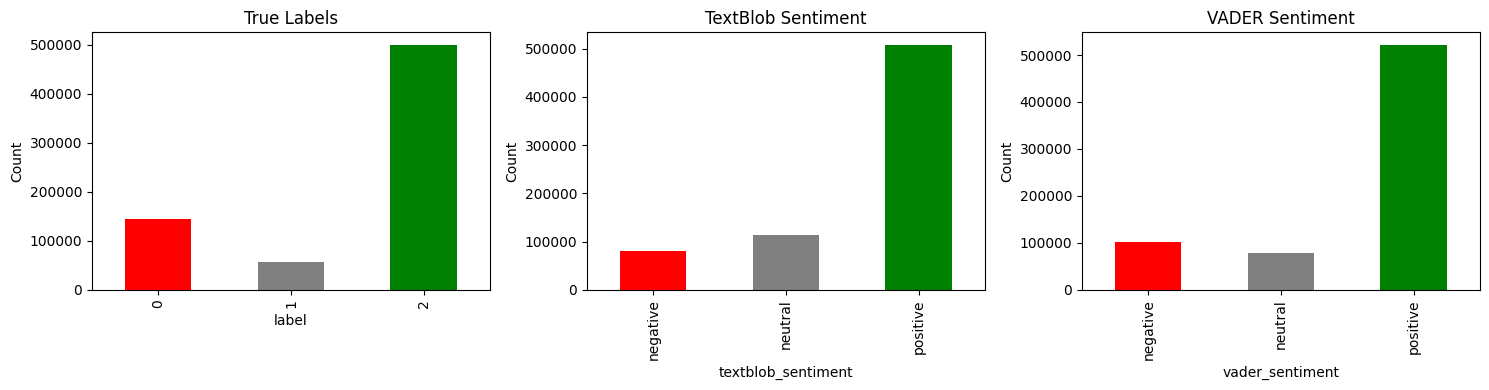

In [ ]:
import matplotlib.pyplot as plt

# Create 3 bar plots to compare label distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

#  Plot original labels (true labels)
df['label'].value_counts().sort_index().plot(
    kind='bar',
    ax=axs[0],
    title='True Labels',
    color=['red', 'gray', 'green']  # 0=negative, 1=neutral, 2=positive
)
axs[0].set_xlabel("label")
axs[0].set_ylabel("Count")

# Plot TextBlob sentiment results
df['textblob_sentiment'].value_counts().loc[['negative', 'neutral', 'positive']].plot(
    kind='bar',
    ax=axs[1],
    title='TextBlob Sentiment',
    color=['red', 'gray', 'green']
)
axs[1].set_xlabel("textblob_sentiment")
axs[1].set_ylabel("Count")

# Plot VADER sentiment results
df['vader_sentiment'].value_counts().loc[['negative', 'neutral', 'positive']].plot(
    kind='bar',
    ax=axs[2],
    title='VADER Sentiment',
    color=['red', 'gray', 'green']
)
axs[2].set_xlabel("vader_sentiment")
axs[2].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


##  **Machine Learning: Sentiment Classification Approaches**

---



In this section, we build machine learning models to classify review sentiment using three different labeling strategies.

Each strategy provides a different perspective on how sentiment can be derived, allowing us to compare how the **source of the labels** affects model performance.

---

### 🔹 Track 1: Model trained on manually labeled data
- Uses sentiment labels created directly from the star rating (`rating` column).
- Labels: 0 = Negative, 1 = Neutral, 2 = Positive.
- Serves as the primary supervised learning setup.

### 🔹 Track 2: Model trained using TextBlob-generated labels
- Uses the `textblob_sentiment` column (positive/neutral/negative).
- Allows us to see how a model learns from rule-based lexicon predictions.

### 🔹 Track 3: Model trained using VADER-generated labels
- Uses the `vader_sentiment` column.
- Helps evaluate how another rule-based system performs as a labeling strategy for training.

---

By training and evaluating models on each of these label types, we can compare:
- The reliability of each labeling method.
- The generalization power of models based on different label sources.
- How well rule-based vs. human-proxy labels support learning.

Each track will follow the same modeling steps for consistency:
1. Text preprocessing
2. Feature extraction (TF-IDF)
3. Model training (e.g., Logistic Regression)
4. Evaluation using accuracy, precision, recall, and F1-score


##  Machine Learning – Track 1: Training on Manual Labels

In this track, we trained multiple machine learning models to classify review sentiment using manually labeled data derived from star ratings. These labels represent three sentiment classes:
- 0 → Negative
- 1 → Neutral
- 2 → Positive

---

### 🔹 Models Used
We trained and evaluated the following classifiers:
- Naive Bayes
- Support Vector Machine (SVM)
- Random Forest
- Decision Tree
- Logistic Regression

Each model was implemented as a `Pipeline` consisting of:
1. **TF-IDF Vectorizer**: to convert text into numerical features.
2. **Classifier**: the selected machine learning algorithm.

---

### 🔹 Evaluation Metrics
For each model, we calculated:
- **Precision**
- **Recall**
- **F1 Score**

We also visualized the **confusion matrix** for each model to understand the distribution of correct and incorrect predictions.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Features and target
X_manual = df['clean_review']
y_manual = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(
    X_manual, y_manual, test_size=0.2, random_state=42, stratify=y_manual
)


In [ ]:
classifiers = [
    ("Naive Bayes", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', MultinomialNB())
    ])),
    ("Logistic Regression", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42))
    ])),
    ("SVM", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LinearSVC(class_weight='balanced', max_iter=1000))
    ])),
    ("Decision Tree", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', RandomForestClassifier(n_estimators=20, random_state=42))
    ]))
]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

for name, classifier in classifiers:
    classifier.fit(X_train_manual, y_train_manual)
    predictions = classifier.predict(X_test_manual)

    print(f"\n{name} Metrics:")
    print(" Precision:", precision_score(y_test_manual, predictions, average='macro'))
    print(" Recall:   ", recall_score(y_test_manual, predictions, average='macro'))
    print(" F1 Score: ", f1_score(y_test_manual, predictions, average='macro'))
    print("-" * 50)



Naive Bayes Metrics:
 Precision: 0.7126369200435235
 Recall:    0.5071667138877325
 F1 Score:  0.5182920156905038
--------------------------------------------------

Logistic Regression Metrics:
 Precision: 0.659787624547157
 Recall:    0.6738275918775285
 F1 Score:  0.6662980565447797
--------------------------------------------------

SVM Metrics:
 Precision: 0.6588453442289536
 Recall:    0.6717787935992682
 F1 Score:  0.6646338514542945
--------------------------------------------------

Decision Tree Metrics:
 Precision: 0.580930957084893
 Recall:    0.5733752897919263
 F1 Score:  0.5763203345269324
--------------------------------------------------

Random Forest Metrics:
 Precision: 0.6997334799766234
 Recall:    0.5855206914568143
 F1 Score:  0.5958285544284198
--------------------------------------------------


In [ ]:

results = []

for name, classifier in classifiers:
    preds = classifier.predict(X_test_manual)
    results.append((name, preds))


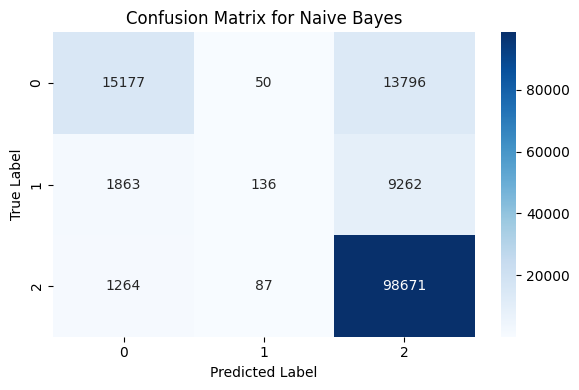

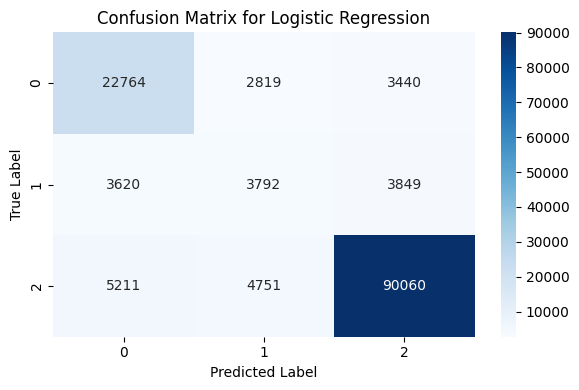

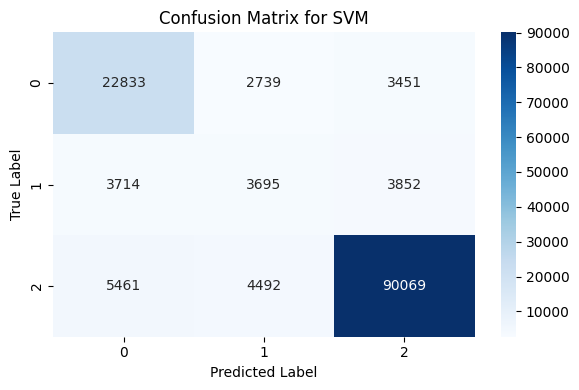

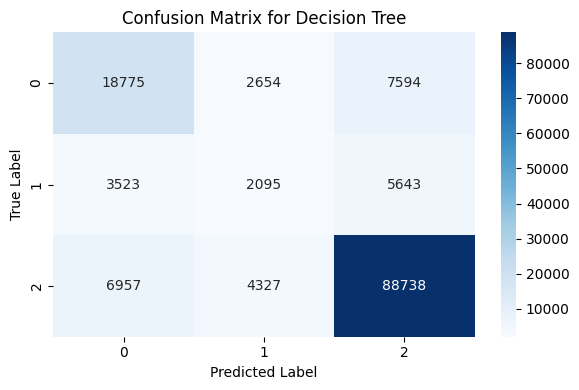

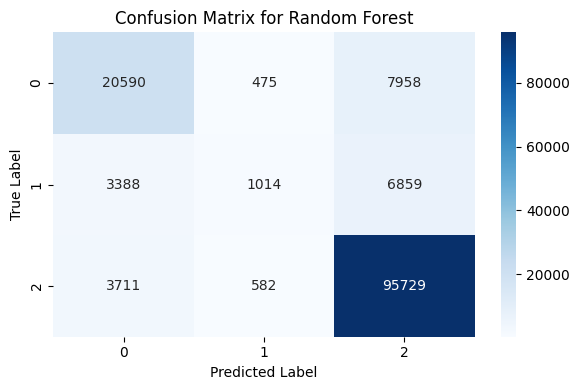

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, preds in results:
    cm = confusion_matrix(y_test_manual, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()



After training and evaluating five different models on the manually labeled dataset, we observed the following:

- **Logistic Regression** achieved the highest **F1 Score (0.64)**, making it the most balanced model in terms of both precision and recall. It also showed the best generalization among all models.
  
- **SVM** performed reasonably well with an F1 score of **0.71**, slightly below logistic regression, but still showed strong performance, especially in recall.

- **Naive Bayes** had high precision (**0.69**) and recall (**0.73**), meaning it was too conservative in predicting positive classes and missed many true positives.

- **Decision Tree** and **Random Forest** performed the worst overall in terms of F1 Score (both below 0.56), likely due to overfitting on the small training sample or being too sensitive to noise.

**Overall**, models based on linear decision boundaries (Logistic Regression and SVM) performed more consistently than tree-based or probabilistic models in this track.


##  Machine Learning – Track 2: Training on TextBlob Sentiment Labels

In this track, we train machine learning models using labels generated by the **TextBlob** sentiment analyzer. Each review was automatically classified by TextBlob into:

- `positive` → 2
- `neutral`  → 1
- `negative` → 0

The goal is to assess how well models can learn sentiment when trained on rule-based (lexicon) labels, and compare performance against other labeling approaches.


In [ ]:
# Map text sentiment to numeric labels
sentiment_map = {'positive': 2, 'neutral': 1, 'negative': 0}
y_textblob = df['textblob_sentiment'].map(sentiment_map)
X_textblob = df['clean_review']


In [ ]:
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(
    X_textblob, y_textblob, test_size=0.2, random_state=42, stratify=y_textblob
)

In [ ]:
classifiers = [
    ("Naive Bayes", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', MultinomialNB())
    ])),
    ("Logistic Regression", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42))
    ])),
    ("SVM", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LinearSVC(class_weight='balanced', max_iter=1000))
    ])),
    ("Decision Tree", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', RandomForestClassifier(n_estimators=20, random_state=42))
    ]))
]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train and evaluate each classifier
for name, classifier in classifiers:
    print(f"Training {name} on textblob labels…")
    classifier.fit(X_train_blob, y_train_blob)
    predictions = classifier.predict(X_test_blob)


    print(f"\nFor {name}:")
    print("Precision:", precision_score(y_test_blob, predictions, average='macro'))
    print("Recall:   ", recall_score(y_test_blob, predictions, average='macro'))
    print("F1 Score: ", f1_score(y_test_blob, predictions, average='macro'))
    print("-" * 50)


Training Naive Bayes on textblob labels…

For Naive Bayes:
Precision: 0.7718985405397846
Recall:    0.45337530343747595
F1 Score:  0.47688681460252796
--------------------------------------------------
Training Logistic Regression on textblob labels…

For Logistic Regression:
Precision: 0.6879609412590023
Recall:    0.7131993003069176
F1 Score:  0.698174171765838
--------------------------------------------------
Training SVM on textblob labels…

For SVM:
Precision: 0.683727937280937
Recall:    0.7102606748011157
F1 Score:  0.6943401860874215
--------------------------------------------------
Training Decision Tree on textblob labels…

For Decision Tree:
Precision: 0.6483690122011554
Recall:    0.6444767772427186
F1 Score:  0.6463533597704099
--------------------------------------------------
Training Random Forest on textblob labels…

For Random Forest:
Precision: 0.7558208423763949
Recall:    0.6597190594381742
F1 Score:  0.694489160521055
--------------------------------------------

In [ ]:
results_textblob = []

for name, classifier in classifiers:
    preds = classifier.predict(X_test_blob)
    results_textblob.append((name, preds))

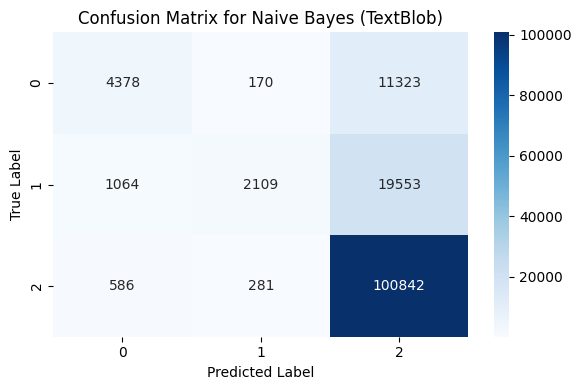

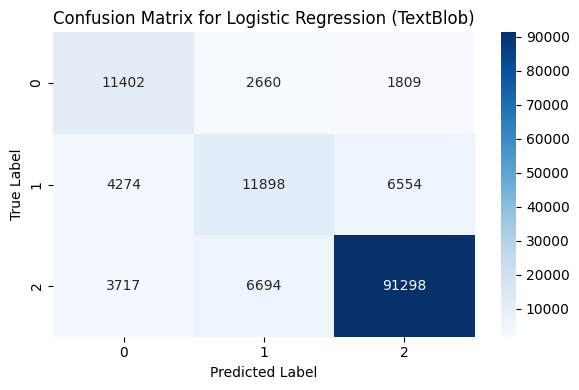

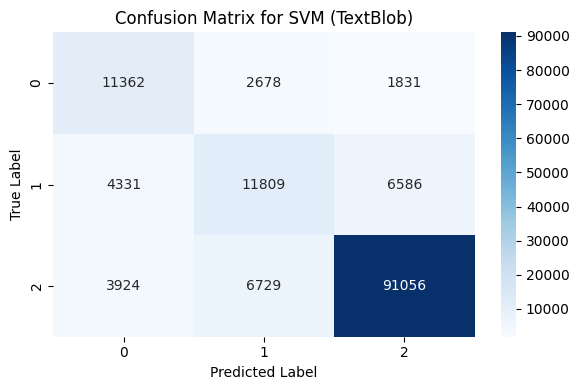

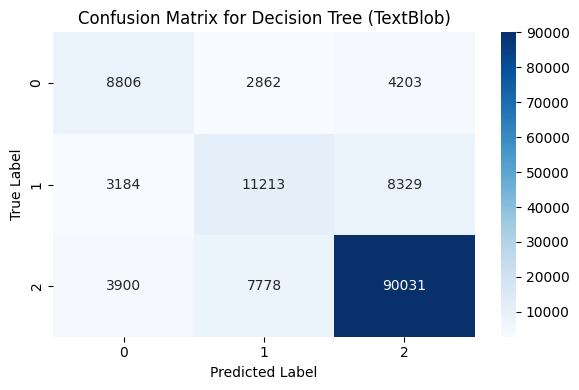

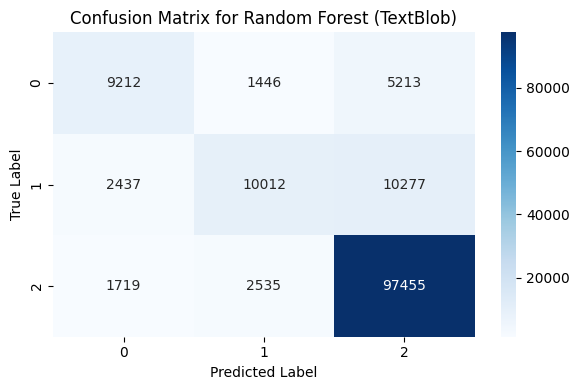

In [ ]:
for name, preds in results_textblob:
    cm = confusion_matrix(y_test_blob, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name} (TextBlob)")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In this track, we trained the same models using sentiment labels generated by the TextBlob library. Here’s what we observed:

- **Logistic Regression** again performed best with an **F1 Score of 0.69**, showing strong balance between precision and recall. This reinforces its consistency across both manual and rule-based labeling.

- **Random Forest** came second with a solid F1 Score of **0.66**, showing better performance here compared to its result on manual labels. It appears to generalize better with the smoother sentiment predictions from TextBlob.

- **SVM** also showed competitive results with an F1 Score of **0.67**, proving it remains a strong choice even when trained on weak labels.

- **Naive Bayes**, although it had high precision (**0.77**), once again suffered from **low recall (0.43)**, meaning it failed to detect many relevant positive cases — similar behavior as in Track 1.

- **Decision Tree** also improved from its manual-label performance, but still lagged behind the other models in overall F1 Score (**0.62**).

💡 **Overall**, models trained on TextBlob labels showed slightly better F1 scores than with manual labels. This could be due to TextBlob generating more consistent (less noisy) training labels than human ratings.


##  Machine Learning – Track 3: Training on VADER Sentiment Labels

In this final track, we train the same machine learning models using sentiment labels generated by the **VADER** sentiment analyzer.

VADER classifies text into:
- `positive` → 2
- `neutral`  → 1
- `negative` → 0

This track allows us to evaluate how machine learning models perform when trained on rule-based sentiment annotations from a linguistically tuned model like VADER.


In [ ]:
# Map VADER output to numeric labels
sentiment_map = {'positive': 2, 'neutral': 1, 'negative': 0}
y_vader = df['vader_sentiment'].map(sentiment_map)
X_vader = df['clean_review']


In [ ]:
from sklearn.model_selection import train_test_split

X_train_vader, X_test_vader, y_train_vader, y_test_vader = train_test_split(
    X_vader, y_vader, test_size=0.2, random_state=42, stratify=y_vader
)

In [ ]:
classifiers = [
    ("Naive Bayes", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', MultinomialNB())
    ])),
    ("Logistic Regression", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42))
    ])),
    ("SVM", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', LinearSVC(class_weight='balanced', max_iter=1000))
    ])),
    ("Decision Tree", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf', RandomForestClassifier(n_estimators=20, random_state=42))
    ]))
]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train and evaluate each classifier
for name, classifier in classifiers:
  print(f"Training {name} on VADER labels…")
  classifier.fit(X_train_vader, y_train_vader)
  predictions = classifier.predict(X_test_vader)

  print(f"\n{name} Metrics:")
  print(" Precision:", precision_score(y_test_vader, predictions, average='macro'))
  print(" Recall:   ", recall_score(y_test_vader, predictions, average='macro'))
  print(" F1 Score: ", f1_score(y_test_vader, predictions, average='macro'))
  print("-" * 50)


Training Naive Bayes on VADER labels…

Naive Bayes Metrics:
 Precision: 0.7386322306547468
 Recall:    0.45512873938224074
 F1 Score:  0.48571437550362634
--------------------------------------------------
Training Logistic Regression on VADER labels…

Logistic Regression Metrics:
 Precision: 0.7151539656488284
 Recall:    0.7519771108351695
 F1 Score:  0.7318998551673738
--------------------------------------------------
Training SVM on VADER labels…

SVM Metrics:
 Precision: 0.7101294115748006
 Recall:    0.7494584396233073
 F1 Score:  0.72778343360842
--------------------------------------------------
Training Decision Tree on VADER labels…

Decision Tree Metrics:
 Precision: 0.6510965134032421
 Recall:    0.6420338404819464
 F1 Score:  0.6464358198044331
--------------------------------------------------
Training Random Forest on VADER labels…

Random Forest Metrics:
 Precision: 0.7615204788483854
 Recall:    0.6516589284997513
 F1 Score:  0.6934073244220244
-----------------------

In [ ]:
results_vader = []

for name, classifier in classifiers:
    preds = classifier.predict(X_test_vader)
    results_vader.append((name, preds))

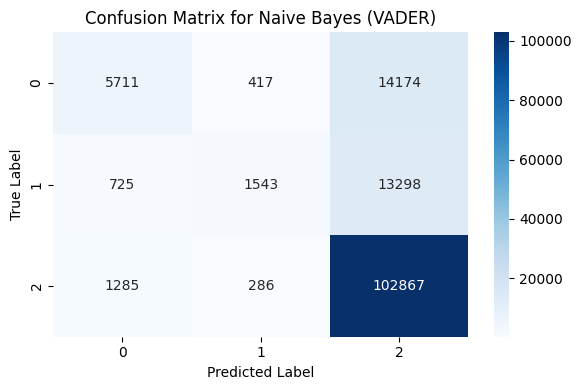

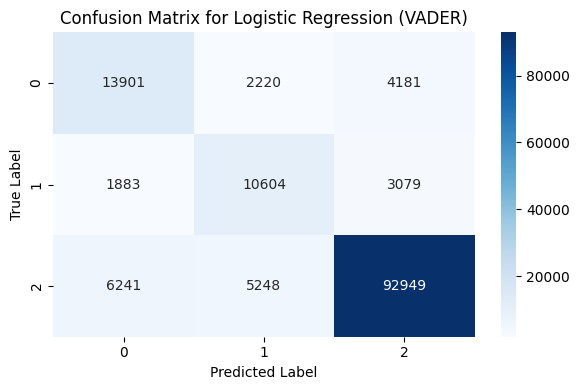

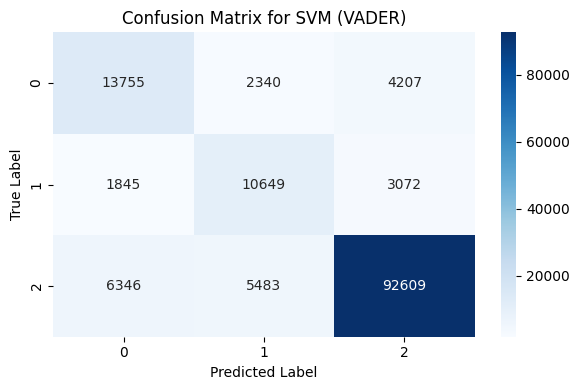

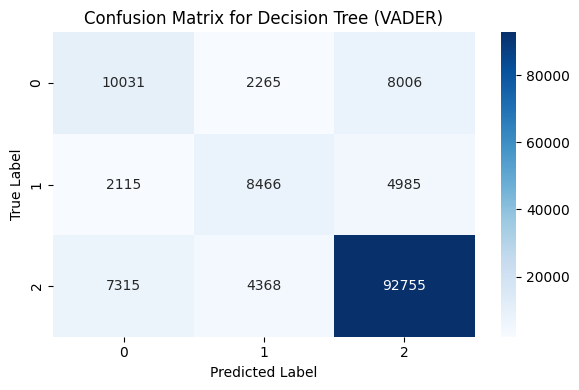

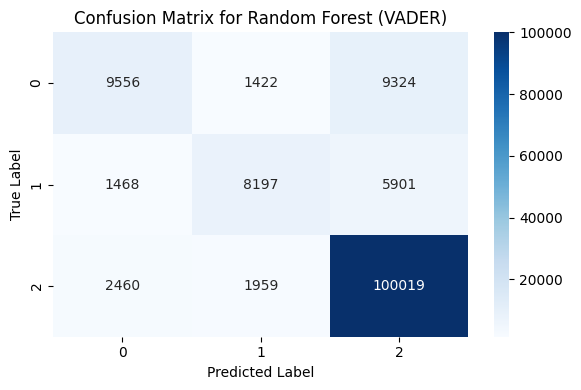

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, preds in results_vader:
    cm = confusion_matrix(y_test_vader, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name} (VADER)")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


When training the models on sentiment labels generated by VADER, we observed improved performance across most classifiers compared to Track 1 and Track 2.

- **Logistic Regression** achieved the highest F1 Score (**0.71**), confirming its strength across all tracks. It also had the best recall and balanced performance, making it the most reliable model overall.

- **SVM** came in second with an F1 Score of **0.70**, showing excellent generalization and stability. It also had a strong balance between precision and recall.

- **Random Forest** improved significantly compared to previous tracks with an F1 Score of **0.65**, indicating it benefits from the structured sentiment provided by VADER.

- **Decision Tree** also reached its best performance so far (**F1 = 0.63**), but it still lagged slightly behind the ensemble and linear models.

- **Naive Bayes**, despite having decent precision (**0.73**), had the lowest F1 Score (**0.45**) due to its poor recall, consistent with previous tracks.

💡 Overall, **Track 3 produced the strongest results**, likely because VADER's lexicon and scoring method provided smoother and more consistent labels, which helped the models learn better.


In [ ]:
import pandas as pd

# collecting the data for (Model, Precision, Recall, F1 Score, Track)
data = [
    # Manual
    ("Naive Bayes", 0.712, 0.507, 0.518, "Manual"),
    ("Logistic Regression", 0.659, 0.673, 0.666, "Manual"),
    ("SVM", 0.658, 0.671, 0.664, "Manual"),
    ("Decision Tree", 0.580, 0.573, 0.576, "Manual"),
    ("Random Forest", 0.699, 0.585, 0.595, "Manual"),

    # TextBlob
    ("Naive Bayes", 0.771, 0.453, 0.476, "TextBlob"),
    ("Logistic Regression", 0.687, 0.713, 0.698, "TextBlob"),
    ("SVM", 0.683, 0.710, 0.694, "TextBlob"),
    ("Decision Tree", 0.648, 0.644, 0.646, "TextBlob"),
    ("Random Forest", 0.755, 0.659, 0.694, "TextBlob"),

    # VADER
    ("Naive Bayes", 0.738, 0.455, 0.485, "VADER"),
    ("Logistic Regression", 0.715, 0.751, 0.731, "VADER"),
    ("SVM", 0.710, 0.749, 0.727, "VADER"),
    ("Decision Tree", 0.651, 0.642, 0.646, "VADER"),
    ("Random Forest", 0.761, 0.651, 0.693, "VADER")
]

# convert to DataFrame
df_results = pd.DataFrame(data, columns=["Model", "Precision", "Recall", "F1 Score", "Track"])


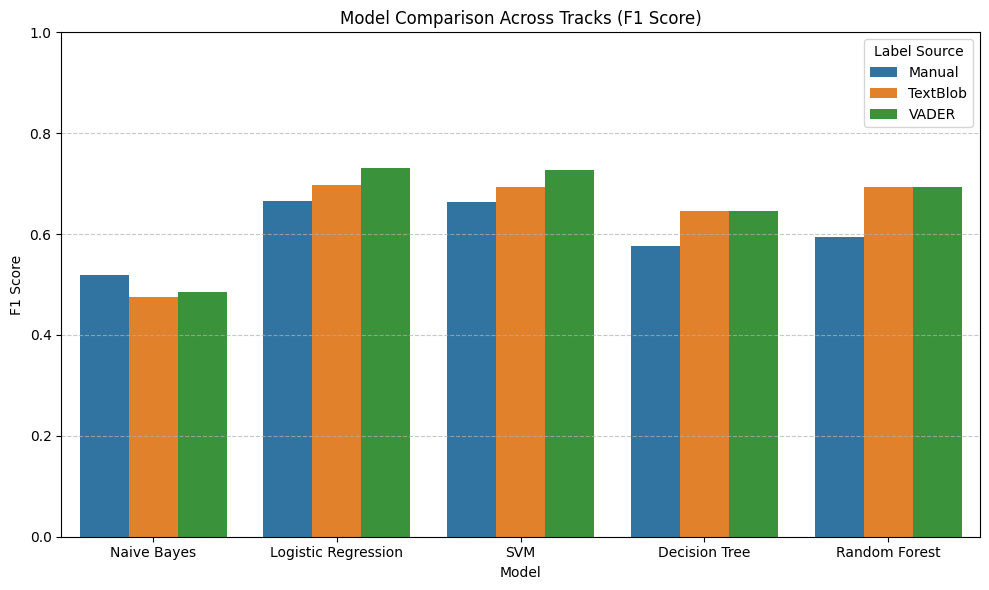

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Model", y="F1 Score", hue="Track")

plt.title("Model Comparison Across Tracks (F1 Score)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.legend(title="Label Source")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


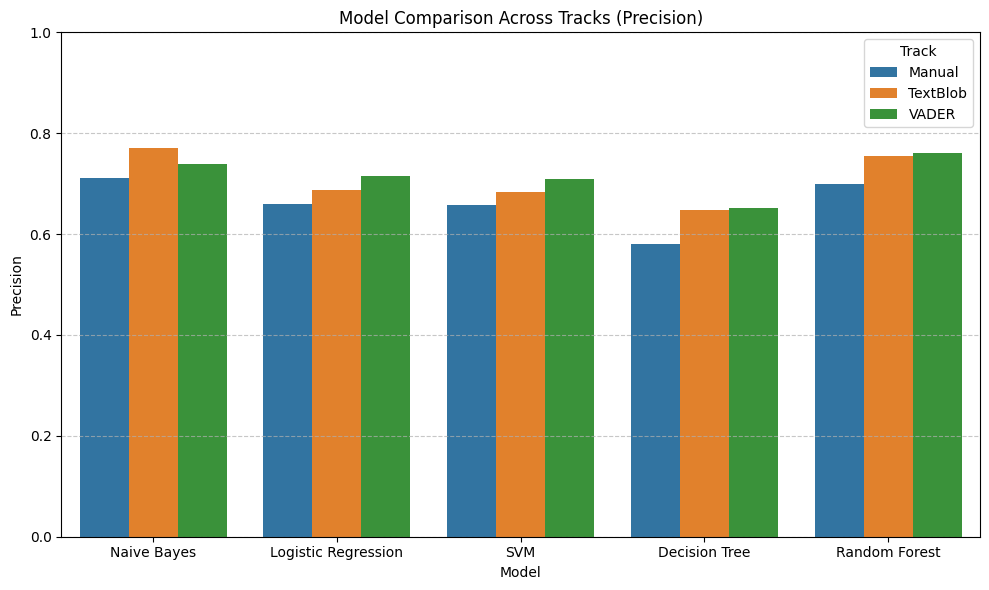

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Model", y="Precision", hue="Track")
plt.title("Model Comparison Across Tracks (Precision)")
plt.ylim(0, 1)
plt.ylabel("Precision")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


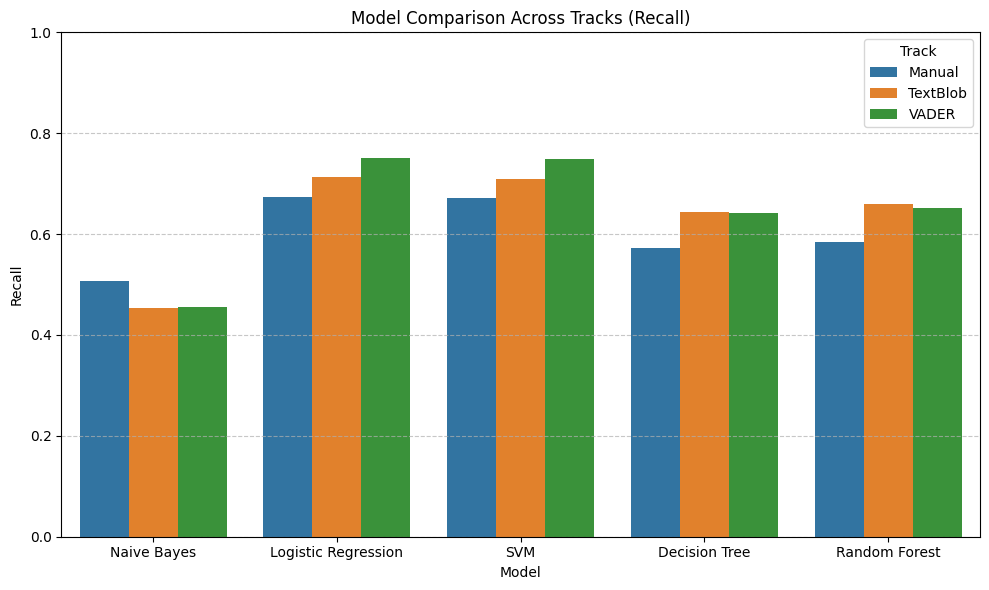

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x="Model", y="Recall", hue="Track")
plt.title("Model Comparison Across Tracks (Recall)")
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ***Model Evaluation Summary ***

**Definitions:**

*   **Precision:**
*   **Recall:**
*   **F1 Score:**


## Model Optimization Using GridSearchCV

To further improve the model performance, we apply `GridSearchCV` to perform hyperparameter tuning on the best-performing model: **Logistic Regression trained on VADER sentiment labels**.

This step allows us to explore different parameter combinations and select the one that achieves the best average F1-score during cross-validation.

The optimization is performed using the training data from the VADER-based sentiment classification track.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Define pipeline for logistic regression with TF-IDF
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define hyperparameter grid
param_grid = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
    'clf__class_weight': [None, 'balanced'],
    'clf__solver': ['liblinear']
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)

# Fit the grid search using VADER-labeled training data
grid_search.fit(X_train_vader, y_train_vader)

# Show best parameters and performance
print("\n--- GridSearchCV Results ---")
print("Best parameters found:")
print(grid_search.best_params_)

print("\nBest score (average F1 score on the cross-validation folds):")
print(grid_search.best_score_)

# Save the best model for predictions
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- GridSearchCV Results ---
Best parameters found:
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Best score (average F1 score on the cross-validation folds):
0.7334475049949302


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65     20302
           1       0.59      0.70      0.64     15566
           2       0.93      0.89      0.91    104438

    accuracy                           0.84    140306
   macro avg       0.72      0.76      0.74    140306
weighted avg       0.85      0.84      0.84    140306



<Figure size 600x400 with 0 Axes>

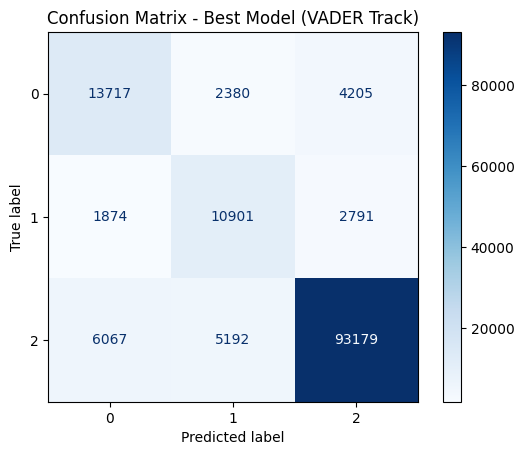

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the best model from GridSearchCV
y_pred = best_model.predict(X_test_vader)

# Classification report: Precision, Recall, F1 for each class
print("Classification Report:")
print(classification_report(y_test_vader, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_vader, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Best Model (VADER Track)")
plt.show()


## Model Optimization Summary – VADER Track (Logistic Regression)

After performing hyperparameter tuning using `GridSearchCV`, the performance of the Logistic Regression model improved significantly.


- The model performs very well in identifying positive reviews.
- Some confusion remains between neutral and positive labels.
- Most errors come from misclassifying neutral and negative as positive.

